### Import libraries

In [199]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.special import boxcox, inv_boxcox

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 500, "display.max_columns", 300)

### Import the Dataset

In [200]:
df = pd.read_csv("telecom_churn_data.csv")

In [201]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Analyze the Dataset

In [202]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [204]:
df.shape

(99999, 226)

### Find the percentage missing values in each column

In [205]:
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_values_df

,% missing
mobile_number,0.000000
circle_id,0.000000
loc_og_t2o_mou,1.018010
std_og_t2o_mou,1.018010
loc_ic_t2o_mou,1.018010
last_date_of_month_6,0.000000
last_date_of_month_7,0.601006
last_date_of_month_8,1.100011
last_date_of_month_9,1.659017
arpu_6,0.000000


### Remove columns with high percentage of missing values

In [206]:
# Here removing all columns with more than 10% missing values,this is because the number of missing columns 
# is either between 3 and 7% or greater than 70%.
df = df.loc[:, df.isnull().mean() <= 0.10]

In [207]:
df.shape

(99999, 186)

In [208]:
# Remove all the duplicate columns in the data (if any)
df = df.loc[:,~df.columns.duplicated()]

In [209]:
df.shape

(99999, 186)

### Remove the columns which are heavily skewed and do not contribute to the model results.

In [210]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)

In [211]:
# Find all columns who have at least one missing value.
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_values_df[missing_values_df['% missing'] > 0]

,% missing
loc_og_t2o_mou,1.018010
std_og_t2o_mou,1.018010
loc_ic_t2o_mou,1.018010
last_date_of_month_7,0.601006
last_date_of_month_8,1.100011
last_date_of_month_9,1.659017
onnet_mou_6,3.937039
onnet_mou_7,3.859039
onnet_mou_8,5.378054
onnet_mou_9,7.745077


In [212]:
# Check the skewness of each column manually (we are not using df.skew())
for col in df.columns.tolist():
    display(pd.DataFrame(df[col].value_counts()))

,mobile_number
7002374769,1
7001115332,1
7000945323,1
7001852588,1
7000146605,1
...,...
7001315706,1
7000616311,1
7000389462,1
7001775481,1


,circle_id
109,99999


,loc_og_t2o_mou
0.0,98981


,std_og_t2o_mou
0.0,98981


,loc_ic_t2o_mou
0.0,98981


,last_date_of_month_6
6/30/2014,99999


,last_date_of_month_7
7/31/2014,99398


,last_date_of_month_8
8/31/2014,98899


,last_date_of_month_9
9/30/2014,98340


,arpu_6
0.000,3731
20.000,99
-5.000,96
1.000,69
1.500,60
...,...
203.220,1
370.395,1
150.080,1
207.238,1


,arpu_7
0.000,3862
-5.000,153
20.000,76
1.500,52
1.000,51
...,...
532.061,1
35.170,1
71.337,1
376.309,1


,arpu_8
0.000,5622
-5.000,205
1.000,66
0.100,51
0.010,50
...,...
302.412,1
319.009,1
121.664,1
187.961,1


,arpu_9
0.000,9069
-5.000,278
1.000,75
1.500,75
0.010,73
...,...
127.586,1
51.540,1
198.251,1
574.289,1


,onnet_mou_6
0.00,8928
0.33,80
0.26,76
0.48,75
0.31,72
...,...
91.43,1
818.31,1
195.71,1
237.73,1


,onnet_mou_7
0.00,9291
1.01,82
0.03,77
0.48,72
0.18,67
...,...
203.89,1
298.11,1
601.29,1
297.89,1


,onnet_mou_8
0.00,9419
0.38,87
1.01,83
0.41,77
0.36,74
...,...
476.79,1
453.41,1
403.04,1
94.43,1


,onnet_mou_9
0.00,10827
1.01,86
0.38,75
0.41,73
0.36,71
...,...
166.34,1
469.24,1
189.01,1
92.78,1


,offnet_mou_6
0.00,3715
1.01,42
0.01,41
0.58,35
0.03,31
...,...
1625.28,1
650.73,1
2154.61,1
407.68,1


,offnet_mou_7
0.00,3840
0.03,38
0.35,35
1.01,33
0.36,33
...,...
470.04,1
334.43,1
622.41,1
721.54,1


,offnet_mou_8
0.00,4176
0.03,40
0.41,39
1.01,37
0.18,35
...,...
158.98,1
1108.21,1
1905.51,1
201.94,1


,offnet_mou_9
0.00,5216
0.03,48
1.01,46
0.18,43
0.31,38
...,...
840.01,1
392.69,1
294.66,1
425.28,1


,roam_ic_mou_6
0.00,76747
1.01,78
0.71,47
0.30,43
0.15,38
...,...
32.64,1
131.44,1
290.24,1
28.95,1


,roam_ic_mou_7
0.00,81294
1.01,79
0.20,44
0.03,38
0.51,38
...,...
711.11,1
127.78,1
75.26,1
45.83,1


,roam_ic_mou_8
0.00,80169
1.01,64
0.25,38
0.28,36
0.68,34
...,...
36.11,1
28.95,1
77.84,1
40.19,1


,roam_ic_mou_9
0.00,79116
1.01,60
0.03,34
1.03,33
0.68,32
...,...
56.69,1
499.44,1
248.04,1
53.83,1


,roam_og_mou_6
0.00,76664
0.21,73
1.01,42
0.33,37
0.35,35
...,...
639.13,1
310.99,1
553.58,1
22.90,1


,roam_og_mou_7
0.00,81344
1.01,37
0.43,30
0.21,26
0.68,26
...,...
221.58,1
71.43,1
359.43,1
54.58,1


,roam_og_mou_8
0.00,80273
0.03,33
0.43,28
0.23,28
0.18,27
...,...
112.59,1
118.71,1
87.73,1
306.19,1


,roam_og_mou_9
0.00,79359
0.21,47
1.01,35
0.43,32
0.26,28
...,...
22.40,1
97.76,1
204.04,1
71.33,1


,loc_og_t2t_mou_6
0.00,15994
0.33,133
0.48,119
0.26,105
0.31,105
...,...
129.94,1
1083.91,1
190.14,1
372.24,1


,loc_og_t2t_mou_7
0.00,15764
0.48,118
1.01,113
0.56,112
0.43,104
...,...
67.89,1
216.44,1
341.71,1
158.86,1


,loc_og_t2t_mou_8
0.00,15604
0.38,139
0.43,119
0.48,117
0.36,116
...,...
240.83,1
97.66,1
268.16,1
87.84,1


,loc_og_t2t_mou_9
0.00,16320
0.68,108
1.01,107
0.28,104
0.36,102
...,...
14.05,1
1020.94,1
885.98,1
445.01,1


,loc_og_t2m_mou_6
0.00,9366
1.01,53
0.48,53
0.56,52
0.23,50
...,...
213.09,1
815.44,1
217.83,1
181.34,1


,loc_og_t2m_mou_7
0.00,9095
0.53,63
0.36,56
0.33,55
0.78,51
...,...
747.31,1
205.31,1
291.21,1
418.79,1


,loc_og_t2m_mou_8
0.00,9183
0.01,57
0.73,57
0.33,54
0.41,49
...,...
708.66,1
303.31,1
660.78,1
191.63,1


,loc_og_t2m_mou_9
0.00,9833
0.45,51
0.36,50
0.66,50
0.53,49
...,...
56.84,1
328.99,1
200.96,1
246.48,1


,loc_og_t2f_mou_6
0.00,56420
0.28,223
0.38,211
0.33,206
0.43,195
...,...
67.36,1
129.01,1
53.94,1
35.26,1


,loc_og_t2f_mou_7
0.00,55984
0.38,221
0.46,214
0.36,211
0.33,211
...,...
58.73,1
43.04,1
44.09,1
35.08,1


,loc_og_t2f_mou_8
0.00,55595
0.38,204
0.25,204
0.23,201
0.31,196
...,...
57.98,1
25.29,1
84.66,1
51.01,1


,loc_og_t2f_mou_9
0.00,54667
0.38,217
0.26,200
0.31,199
0.28,197
...,...
25.08,1
101.68,1
116.46,1
128.51,1


,loc_og_t2c_mou_6
0.00,77022
0.01,215
0.03,187
0.06,168
0.08,158
...,...
27.06,1
18.73,1
24.56,1
28.79,1


,loc_og_t2c_mou_7
0.00,75744
0.01,209
0.06,183
0.08,175
0.03,166
...,...
59.13,1
10.20,1
30.73,1
30.03,1


,loc_og_t2c_mou_8
0.00,73299
0.01,249
0.13,195
0.03,181
0.06,173
...,...
10.39,1
44.18,1
43.29,1
45.03,1


,loc_og_t2c_mou_9
0.00,72758
0.01,221
0.06,185
0.05,161
0.03,157
...,...
36.81,1
34.21,1
24.23,1
22.04,1


,loc_og_mou_6
0.00,8200
0.63,41
0.23,37
0.28,37
0.01,37
...,...
465.54,1
150.54,1
464.46,1
2408.06,1


,loc_og_mou_7
0.00,7998
0.03,43
0.56,39
2.48,38
0.33,38
...,...
421.68,1
809.93,1
1357.78,1
475.89,1


,loc_og_mou_8
0.00,8119
0.23,41
0.01,39
0.43,38
0.38,36
...,...
820.13,1
237.06,1
236.94,1
1006.41,1


,loc_og_mou_9
0.00,8739
0.03,47
0.01,43
1.01,39
0.26,38
...,...
247.44,1
356.49,1
1621.81,1
235.89,1


,std_og_t2t_mou_6
0.00,52259
0.43,71
0.01,61
0.48,61
0.25,61
...,...
649.76,1
241.69,1
863.48,1
39.31,1


,std_og_t2t_mou_7
0.00,52535
0.36,63
0.33,63
0.31,62
0.61,60
...,...
82.54,1
1349.34,1
225.36,1
211.18,1


,std_og_t2t_mou_8
0.00,52113
0.31,74
0.50,64
0.56,61
0.45,61
...,...
3877.54,1
90.68,1
1168.71,1
1279.89,1


,std_og_t2t_mou_9
0.00,51977
0.51,62
0.48,60
0.58,58
0.38,57
...,...
308.91,1
431.24,1
292.16,1
25.60,1


,std_og_t2m_mou_6
0.00,36795
0.50,98
0.46,92
0.35,89
0.33,89
...,...
1008.19,1
187.29,1
605.53,1
243.76,1


,std_og_t2m_mou_7
0.00,37779
0.31,117
0.51,97
0.33,95
0.35,92
...,...
83.64,1
819.89,1
263.18,1
17.20,1


,std_og_t2m_mou_8
0.00,37699
1.01,95
0.38,92
0.58,90
0.36,85
...,...
124.68,1
731.83,1
574.41,1
299.64,1


,std_og_t2m_mou_9
0.00,38289
0.38,95
0.51,89
0.63,87
0.28,85
...,...
595.08,1
991.53,1
210.68,1
372.44,1


,std_og_t2f_mou_6
0.00,84451
0.53,67
0.38,67
0.41,63
0.36,63
...,...
25.73,1
45.03,1
33.51,1
41.74,1


,std_og_t2f_mou_7
0.00,85213
0.21,60
0.28,56
0.83,55
0.23,54
...,...
84.34,1
55.19,1
54.81,1
31.45,1


,std_og_t2f_mou_8
0.00,83754
0.43,60
0.21,60
0.36,60
0.35,59
...,...
45.89,1
22.61,1
27.06,1
61.78,1


,std_og_t2f_mou_9
0.00,81852
0.25,78
0.33,55
0.28,54
0.26,53
...,...
73.66,1
49.34,1
39.01,1
11.81,1


,std_og_t2c_mou_6
0.0,96062


,std_og_t2c_mou_7
0.0,96140


,std_og_t2c_mou_8
0.0,94621


,std_og_t2c_mou_9
0.0,92254


,std_og_mou_6
0.00,29413
0.58,89
0.48,89
0.31,89
0.53,88
...,...
58.60,1
425.96,1
1470.21,1
487.88,1


,std_og_mou_7
0.00,30566
0.31,103
0.33,97
0.28,87
0.38,87
...,...
78.24,1
512.19,1
138.58,1
809.23,1


,std_og_mou_8
0.00,30381
1.01,94
0.25,91
0.23,90
0.43,89
...,...
1189.06,1
1101.16,1
492.81,1
776.31,1


,std_og_mou_9
0.00,31207
0.31,95
0.38,95
0.28,92
0.45,89
...,...
1626.81,1
62.31,1
86.31,1
1348.09,1


,isd_og_mou_6
0.00,91263
1.01,114
0.01,105
0.03,94
0.06,69
...,...
6.74,1
45.58,1
34.04,1
37.31,1


,isd_og_mou_7
0.00,91650
0.01,112
1.01,101
0.03,77
0.05,76
...,...
11.46,1
3.36,1
9.14,1
8.20,1


,isd_og_mou_8
0.00,90457
0.01,97
0.03,86
1.01,85
0.06,62
...,...
21.38,1
16.01,1
98.51,1
160.96,1


,isd_og_mou_9
0.00,87950
0.01,99
1.01,98
0.03,75
0.05,68
...,...
101.78,1
6.68,1
15.44,1
6.58,1


,spl_og_mou_6
0.00,54326
0.21,402
0.01,354
0.03,298
0.08,253
...,...
51.63,1
105.74,1
43.96,1
262.88,1


,spl_og_mou_7
0.00,50442
0.01,378
0.21,259
0.03,256
0.08,240
...,...
28.20,1
123.83,1
144.23,1
118.69,1


,spl_og_mou_8
0.00,48069
0.01,364
0.03,276
0.08,274
0.06,264
...,...
40.43,1
248.86,1
25.03,1
42.46,1


,spl_og_mou_9
0.00,48710
0.01,349
0.03,302
0.21,267
0.06,262
...,...
89.84,1
103.78,1
63.26,1
63.49,1


,og_others_6
0.00,79128
0.21,584
0.43,218
0.20,152
0.65,146
...,...
6.80,1
28.74,1
10.88,1
38.24,1


,og_others_7
0.00,95793
0.16,16
0.33,7
0.05,7
0.25,6
0.38,6
0.45,6
0.21,6
0.03,6
0.06,5


,og_others_8
0.00,94210
0.16,23
0.01,13
0.03,11
0.11,9
0.30,7
0.05,7
2.26,6
0.15,6
0.06,5


,og_others_9
0.00,91832
0.16,17
0.18,11
0.66,8
0.98,7
0.36,7
0.60,6
0.33,5
0.01,5
0.70,4


,total_og_mou_6
0.00,10055
0.21,94
0.20,33
0.43,31
0.01,26
...,...
1121.59,1
769.44,1
434.63,1
604.33,1


,total_og_mou_7
0.00,9758
0.21,48
0.03,26
0.20,24
0.93,23
...,...
1264.26,1
421.53,1
846.63,1
1434.74,1


,total_og_mou_8
0.00,11348
0.21,28
0.23,27
0.36,24
0.05,23
...,...
1689.46,1
376.34,1
485.61,1
196.93,1


,total_og_mou_9
0.00,14143
0.21,81
0.20,49
0.43,35
1.01,33
...,...
954.74,1
101.61,1
2041.63,1
1419.18,1


,loc_ic_t2t_mou_6
0.00,12379
0.38,104
0.33,100
0.36,100
0.43,97
...,...
285.84,1
187.78,1
267.28,1
233.34,1


,loc_ic_t2t_mou_7
0.00,11708
0.78,116
0.33,107
0.26,97
0.66,94
...,...
1199.96,1
305.38,1
12.30,1
159.56,1


,loc_ic_t2t_mou_8
0.00,11505
0.36,105
0.53,99
0.43,96
0.40,95
...,...
105.36,1
76.73,1
563.51,1
201.48,1


,loc_ic_t2t_mou_9
0.00,11126
0.41,103
0.48,98
0.78,98
0.21,93
...,...
417.19,1
252.66,1
319.91,1
382.09,1


,loc_ic_t2m_mou_6
0.00,6269
0.58,43
0.31,42
0.30,41
0.26,39
...,...
955.71,1
366.31,1
716.76,1
1001.46,1


,loc_ic_t2m_mou_7
0.00,5673
2.36,39
0.76,38
0.93,37
0.21,36
...,...
678.36,1
95.36,1
334.66,1
268.96,1


,loc_ic_t2m_mou_8
0.00,5459
0.46,38
0.41,37
0.98,35
3.99,33
...,...
340.53,1
440.44,1
5214.93,1
403.48,1


,loc_ic_t2m_mou_9
0.00,5339
0.38,40
0.36,37
0.56,37
0.53,36
...,...
455.28,1
373.83,1
180.34,1
390.76,1


,loc_ic_t2f_mou_6
0.00,39141
0.23,229
0.21,228
0.33,217
0.28,216
...,...
61.56,1
74.23,1
137.14,1
85.43,1


,loc_ic_t2f_mou_7
0.00,38362
0.50,248
0.41,247
0.31,242
0.48,241
...,...
10.90,1
87.89,1
59.63,1
45.50,1


,loc_ic_t2f_mou_8
0.00,37341
0.45,286
0.38,244
0.41,243
0.33,241
...,...
66.64,1
119.49,1
119.01,1
135.88,1


,loc_ic_t2f_mou_9
0.00,35854
0.25,261
0.41,256
0.26,247
0.45,241
...,...
116.04,1
185.84,1
192.41,1
114.54,1


,loc_ic_mou_6
0.00,5176
0.58,30
0.26,30
0.30,29
0.83,28
...,...
186.23,1
314.66,1
571.13,1
747.08,1


,loc_ic_mou_7
0.00,4698
0.76,33
0.56,29
0.35,27
0.38,27
...,...
237.19,1
450.88,1
729.04,1
898.24,1


,loc_ic_mou_8
0.00,4525
0.46,29
0.66,27
1.41,26
0.76,25
...,...
429.53,1
114.56,1
1004.31,1
321.39,1


,loc_ic_mou_9
0.00,4387
0.53,30
0.23,26
0.26,26
0.36,26
...,...
120.33,1
361.33,1
435.38,1
1396.74,1


,std_ic_t2t_mou_6
0.00,54957
0.03,310
0.01,203
0.05,181
0.21,161
...,...
47.51,1
55.73,1
90.68,1
84.34,1


,std_ic_t2t_mou_7
0.00,54535
0.03,318
0.01,213
0.05,179
0.23,173
...,...
45.89,1
149.01,1
110.23,1
55.96,1


,std_ic_t2t_mou_8
0.00,53544
0.03,332
0.01,211
0.05,199
0.06,177
...,...
41.41,1
22.75,1
60.24,1
41.59,1


,std_ic_t2t_mou_9
0.00,53636
0.03,349
0.01,222
0.05,215
0.28,173
...,...
49.54,1
40.71,1
122.24,1
53.69,1


,std_ic_t2m_mou_6
0.00,34602
0.03,212
0.31,196
0.35,178
0.36,178
...,...
606.28,1
308.16,1
258.41,1
194.01,1


,std_ic_t2m_mou_7
0.00,34801
0.03,271
0.31,191
0.23,183
0.30,172
...,...
52.63,1
130.44,1
162.36,1
161.39,1


,std_ic_t2m_mou_8
0.00,34018
0.03,216
0.01,191
0.33,187
0.31,185
...,...
245.23,1
84.19,1
145.99,1
69.81,1


,std_ic_t2m_mou_9
0.00,34357
0.03,212
0.26,187
0.33,185
0.41,168
...,...
171.76,1
176.03,1
179.26,1
133.66,1


,std_ic_t2f_mou_6
0.00,75459
0.31,179
0.43,170
0.33,169
0.20,147
...,...
41.64,1
75.26,1
20.94,1
29.58,1


,std_ic_t2f_mou_7
0.00,75403
0.33,178
0.31,175
0.48,174
0.25,149
...,...
29.39,1
54.73,1
70.09,1
75.04,1


,std_ic_t2f_mou_8
0.00,73994
0.33,175
0.26,152
0.31,142
0.36,142
...,...
65.69,1
25.66,1
39.46,1
423.84,1


,std_ic_t2f_mou_9
0.00,70927
0.31,184
0.25,158
0.21,157
0.26,156
...,...
150.91,1
67.08,1
140.13,1
287.74,1


,std_ic_t2o_mou_6
0.0,96062


,std_ic_t2o_mou_7
0.0,96140


,std_ic_t2o_mou_8
0.0,94621


,std_ic_t2o_mou_9
0.0,92254


,std_ic_mou_6
0.00,24166
0.31,181
0.43,179
0.33,178
0.03,173
...,...
141.46,1
1004.99,1
574.49,1
445.08,1


,std_ic_mou_7
0.00,24401
0.03,219
0.31,196
0.33,169
0.36,165
...,...
62.06,1
63.94,1
620.71,1
84.56,1


,std_ic_mou_8
0.00,23543
0.03,184
0.31,180
0.36,168
0.35,163
...,...
1385.53,1
324.64,1
363.88,1
390.29,1


,std_ic_mou_9
0.00,23711
0.41,185
0.33,180
0.31,176
0.26,175
...,...
171.78,1
228.33,1
530.68,1
141.16,1


,total_ic_mou_6
0.00,8433
0.18,36
0.28,26
0.20,25
0.56,24
...,...
328.99,1
474.56,1
677.78,1
876.39,1


,total_ic_mou_7
0.00,7962
0.20,37
0.33,24
0.26,21
0.38,21
...,...
1199.46,1
482.69,1
291.31,1
1138.08,1


,total_ic_mou_8
0.00,9345
0.46,22
0.33,21
0.66,20
0.26,20
...,...
341.21,1
168.86,1
1041.38,1
667.59,1


,total_ic_mou_9
0.00,11485
0.25,28
0.26,24
0.28,23
0.53,22
...,...
396.74,1
333.53,1
283.84,1
5861.24,1


,spl_ic_mou_6
0.00,75316
0.15,1653
0.18,948
0.06,895
0.13,893
0.20,764
0.28,738
0.05,699
0.30,676
0.08,656


,spl_ic_mou_7
0.00,85588
0.20,1254
0.18,773
0.06,481
0.05,455
0.08,412
0.40,369
0.11,351
0.10,322
0.36,302


,spl_ic_mou_8
0.00,82923
0.25,1525
0.50,831
0.21,733
0.06,420
0.08,367
0.75,366
0.11,340
0.10,319
0.13,307


,spl_ic_mou_9
0.00,67169
0.06,1292
0.08,989
0.05,974
0.25,887
0.10,854
0.11,826
0.21,655
0.13,643
0.16,575


,isd_ic_mou_6
0.00,80463
0.01,365
0.03,239
0.05,177
0.46,95
...,...
157.39,1
97.18,1
150.53,1
427.89,1


,isd_ic_mou_7
0.00,79890
0.01,153
0.46,104
0.03,98
0.05,92
...,...
37.48,1
41.33,1
73.89,1
171.91,1


,isd_ic_mou_8
0.00,78966
0.46,142
0.01,114
0.03,108
0.45,89
...,...
4.59,1
122.19,1
161.26,1
768.76,1


,isd_ic_mou_9
0.00,76854
0.01,297
0.46,134
0.03,121
0.05,106
...,...
82.73,1
30.26,1
101.59,1
10.34,1


,ic_others_6
0.00,73919
0.06,798
0.48,759
0.05,718
0.08,691
...,...
1065.61,1
20.83,1
215.03,1
19.00,1


,ic_others_7
0.00,76848
0.05,418
0.06,413
0.10,406
0.46,357
...,...
222.61,1
163.33,1
82.06,1
106.91,1


,ic_others_8
0.00,72892
0.10,831
0.06,771
0.08,676
0.13,486
...,...
41.70,1
94.18,1
22.99,1
52.54,1


,ic_others_9
0.00,72018
0.06,566
0.10,518
0.08,495
0.13,364
...,...
26.40,1
43.53,1
13.49,1
30.54,1


,total_rech_num_6
4,11566
3,11445
5,10463
2,9006
6,8854
7,7026
8,5692
1,5005
9,4674
10,3876


,total_rech_num_7
4,12425
3,11782
5,10990
6,8982
2,8076
7,6962
8,5594
9,4580
10,3931
1,3576


,total_rech_num_8
3,11976
2,11112
4,10807
5,9059
6,7490
1,6737
7,6029
8,5173
9,4168
0,3622


,total_rech_num_9
3,12265
2,11999
4,10423
5,8247
1,8089
6,6974
7,5841
8,4792
0,4760
9,3964


,total_rech_amt_6
0,11195
110,3426
120,1928
50,1631
200,1543
...,...
3020,1
1641,1
1705,1
1769,1


,total_rech_amt_7
0,11792
110,3715
50,1880
120,1801
220,1527
...,...
2545,1
3089,1
2705,1
1776,1


,total_rech_amt_8
0,13632
130,3476
50,1757
150,1449
100,1386
...,...
2321,1
2193,1
4114,1
3470,1


,total_rech_amt_9
0,17956
130,3847
50,1850
30,1642
260,1608
...,...
1937,1
1745,1
1681,1
1617,1


,max_rech_amt_6
110,21030
0,11195
50,9555
30,9322
120,5891
154,3944
128,3019
20,2619
90,2500
250,2486


,max_rech_amt_7
110,17469
0,11792
50,10699
30,9565
128,4712
120,4500
154,3942
130,2778
20,2731
252,2505


,max_rech_amt_8
130,17730
0,13632
50,10914
30,9030
154,3473
144,3162
150,3098
252,2675
20,2667
250,2220


,max_rech_amt_9
130,18471
0,17956
50,10118
30,8733
150,2963
252,2770
20,2683
250,2178
175,2076
200,1761


,date_of_last_rech_6
6/30/2014,16960
6/29/2014,12918
6/27/2014,11169
6/28/2014,9491
6/26/2014,5530
6/25/2014,4896
6/17/2014,4145
6/24/2014,4129
6/14/2014,3845
6/21/2014,3747


,date_of_last_rech_7
7/31/2014,17288
7/30/2014,13863
7/25/2014,9401
7/29/2014,9052
7/28/2014,7502
7/27/2014,5909
7/26/2014,5382
7/24/2014,3998
7/19/2014,3057
7/22/2014,2969


,date_of_last_rech_8
8/31/2014,14706
8/30/2014,11707
8/29/2014,10057
8/28/2014,9816
8/26/2014,9297
8/24/2014,7722
8/25/2014,7655
8/27/2014,5688
8/22/2014,2017
8/20/2014,1986


,date_of_last_rech_9
9/29/2014,22623
9/30/2014,21713
9/28/2014,10601
9/27/2014,6473
9/26/2014,6282
9/25/2014,5617
9/24/2014,3224
9/21/2014,2888
9/20/2014,2579
9/23/2014,2435


,last_day_rch_amt_6
0,26871
110,15567
30,11885
50,8079
10,5978
20,5456
120,3841
128,1651
25,1542
154,1491


,last_day_rch_amt_7
0,32416
30,10835
110,8614
50,7752
10,5375
20,4873
128,3303
130,3198
120,2078
25,1588


,last_day_rch_amt_8
0,33556
130,12802
30,10064
50,7854
10,5154
20,4653
150,1729
25,1411
250,1410
144,1365


,last_day_rch_amt_9
0,50976
130,9323
30,7968
50,5866
10,4372
20,3766
150,1302
42,1008
25,953
250,924


,vol_2g_mb_6
0.00,77731
0.01,103
0.02,70
0.03,53
0.07,42
...,...
404.72,1
575.89,1
32.75,1
348.00,1


,vol_2g_mb_7
0.00,77474
0.01,94
0.02,79
0.03,47
0.04,44
...,...
89.96,1
15.61,1
515.44,1
80.18,1


,vol_2g_mb_8
0.00,77214
0.01,105
0.02,82
0.03,62
0.05,47
...,...
129.10,1
613.90,1
706.76,1
24.38,1


,vol_2g_mb_9
0.00,78279
0.01,122
0.02,82
0.03,70
0.04,67
...,...
58.79,1
255.44,1
49.35,1
98.94,1


,vol_3g_mb_6
0.00,85417
0.01,20
0.03,13
0.02,11
0.06,8
...,...
20.15,1
727.63,1
201.24,1
210.63,1


,vol_3g_mb_7
0.00,84578
0.01,20
0.06,11
0.07,10
0.05,9
...,...
116.72,1
465.93,1
336.07,1
523.84,1


,vol_3g_mb_8
0.00,84100
0.01,22
0.03,14
0.04,13
0.13,10
...,...
3093.45,1
1998.83,1
401.93,1
336.07,1


,vol_3g_mb_9
0.00,84638
0.01,18
0.04,17
0.02,16
0.03,14
...,...
181.00,1
2113.99,1
847.12,1
785.98,1


,monthly_2g_6
0,92674
1,6728
2,562
3,28
4,7


,monthly_2g_7
0,92435
1,6855
2,669
3,33
4,5
5,2


,monthly_2g_8
0,92591
1,6775
2,586
3,37
4,8
5,2


,monthly_2g_9
0,93735
1,5695
2,530
3,33
4,6


,sachet_2g_6
0,87096
1,5607
2,2461
3,1333
4,950
5,584
6,464
7,343
8,291
9,230


,sachet_2g_7
0,86694
1,5177
2,2526
3,1327
4,1089
5,792
6,615
7,425
8,357
10,244


,sachet_2g_8
0,85932
1,5789
2,2456
3,1446
4,1148
5,887
6,612
7,398
8,353
9,237


,sachet_2g_9
0,85821
1,6004
2,2601
3,1757
4,1384
5,794
6,523
7,352
8,250
9,180


,monthly_3g_6
0,94290
1,4472
2,861
3,237
4,76
5,34
6,12
7,9
8,3
11,2


,monthly_3g_7
0,94326
1,4263
2,1016
3,227
4,74
5,42
6,26
7,10
8,5
9,4


,monthly_3g_8
0,93933
1,4567
2,1082
3,251
4,98
5,34
6,14
7,11
9,3
8,3


,monthly_3g_9
0,93574
1,4890
2,1147
3,241
4,81
5,35
6,12
8,7
7,7
11,3


,sachet_3g_6
0,95818
1,2990
2,607
3,216
4,108
5,65
6,45
7,45
9,24
8,20


,sachet_3g_7
0,95869
1,2810
2,635
3,229
4,129
5,102
6,64
7,34
8,20
9,20


,sachet_3g_8
0,95809
1,2784
2,638
3,272
4,143
5,105
6,57
7,45
8,33
9,21


,sachet_3g_9
0,95726
1,2849
2,639
3,302
4,155
5,95
6,55
7,36
8,36
11,18


,aon
3651,1309
2372,652
495,319
494,299
492,296
...,...
3218,1
3671,1
3665,1
3381,1


,aug_vbc_3g
0.00,83313
0.17,11
0.05,10
0.07,9
0.26,9
...,...
60.56,1
489.10,1
490.90,1
43.39,1


,jul_vbc_3g
0.00,83902
0.04,10
0.02,10
0.48,9
0.03,9
...,...
381.55,1
888.90,1
428.12,1
91.97,1


,jun_vbc_3g
0.00,84870
0.06,10
0.03,10
0.11,8
0.15,7
...,...
33.93,1
2708.43,1
840.40,1
369.30,1


,sep_vbc_3g
0.00,94637
0.11,14
0.18,14
0.10,14
0.06,13
...,...
9.33,1
124.45,1
416.37,1
36.74,1


In [213]:
# drop the columns with high skewness
drop_columns = ['circle_id', 
                'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g',
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 
                'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',   
                'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
                'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',         
]
others_columns = list(filter(lambda param: 't2o' in param,  df.columns.tolist()))


In [214]:
# drop the columns with high skewness and those that do not contribute much to the model.
df.drop(drop_columns, axis=1, inplace=True)
df.drop(others_columns, axis=1, inplace=True)

### Remove all the date columns

In [215]:
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
        axis=1, inplace=True)

In [216]:
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_values_df[missing_values_df['% missing'] > 0]

,% missing
onnet_mou_6,3.937039
onnet_mou_7,3.859039
onnet_mou_8,5.378054
onnet_mou_9,7.745077
offnet_mou_6,3.937039
offnet_mou_7,3.859039
offnet_mou_8,5.378054
offnet_mou_9,7.745077
roam_ic_mou_6,3.937039
roam_ic_mou_7,3.859039


### Analyse the missing data pattern.

In [217]:
# Check the missing values in each month data cumulatively.
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_values_df[missing_values_df['% missing'] > 0]['% missing'].value_counts()

3.859039    28
7.745077    28
5.378054    28
3.937039    28
Name: % missing, dtype: int64

##### We observe that all the columns of a particular month have the same number of missing values. Below are the details.

In [218]:
missing = {
    'Month': ['June', 'July', 'August', 'September'],
    '% missing': [3.937039, 3.859039, 5.378054, 7.745077]
}

pd.DataFrame.from_dict(missing)

,Month,% missing
0,June,3.937039
1,July,3.859039
2,August,5.378054
3,September,7.745077


In [219]:
len(df.columns)

150

In [220]:
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_columns = missing_values_df[missing_values_df['% missing'] > 0].index
missing_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=112)

In [221]:
# Remove all the rows with more than 70/112 missing values. 70 is a ballpark figure taken so that their isnt much 
# loss of data
df = df[df[missing_columns].isnull().sum(axis=1) < 70]

In [222]:
len(df)

97525

In [223]:
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_values_df

,% missing
mobile_number,0.000000
arpu_6,0.000000
arpu_7,0.000000
arpu_8,0.000000
arpu_9,0.000000
onnet_mou_6,2.621892
onnet_mou_7,1.574981
onnet_mou_8,3.110997
onnet_mou_9,5.487824
offnet_mou_6,2.621892


### Impute the missing values

In [224]:
# Here imputing the values using median. This is because the advanced imputers like KNN and Iterative take 
# a lot of execution time. For using KNN imputer we can comment this cell and uncomment the below cell.
imputer = SimpleImputer(strategy='median')

def impute_values(data, column):
    imputer.fit(data[[column]])
    data[[column]] = imputer.transform(data[[column]])
    return data

for column in df.columns.tolist():
    df = impute_values(df, column)

In [225]:
# KNN imputer: Here the dataset is divided into months so that the imputation can take place for each month data.
# The data corresponding to a single month will give most clear and perfect imputations.

# imputer = KNNImputer(n_neighbors=5)
# columns = df.columns.tolist()
# data_6 = list(filter(lambda param: param[-1] == '6', columns))
# data_7 = list(filter(lambda param: param[-1] == '7', columns))
# data_8 = list(filter(lambda param: param[-1] == '8', columns))
# data_9 = list(filter(lambda param: param[-1] == '9', columns))

# imputed_6 = imputer.fit_transform(df[data_6])
# imputed_7 = imputer.fit_transform(df[data_7])
# imputed_8 = imputer.fit_transform(df[data_8])
# imputed_9 = imputer.fit_transform(df[data_9])

# imputed_6 = pd.DataFrame(
#    data = imputer.transform(df[data_6]), 
#    columns = data_6,
#    dtype='float'
# )

#imputed_7 = pd.DataFrame(
#    data = imputer.transform(df[data_7]), 
#    columns = data_7,
#    dtype='float'
# )

# imputed_8 = pd.DataFrame(
#    data = imputer.transform(df[data_8]), 
#    columns = data_8,
#    dtype='float'
# )

# imputed_9 = pd.DataFrame(
#    data = imputer.transform(df[data_9]), 
#    columns = data_9,
#    dtype='float'
# )

# df[data_6] = imputed_6[data_6]
# df[data_7] = imputed_7[data_7]
# df[data_8] = imputed_8[data_8]
# df[data_9] = imputed_9[data_9]

In [226]:
missing_values_df = pd.DataFrame(100 * (df.isnull().sum() / len(df)))
missing_values_df.columns = ['% missing']
missing_values_df

,% missing
mobile_number,0.0
arpu_6,0.0
arpu_7,0.0
arpu_8,0.0
arpu_9,0.0
onnet_mou_6,0.0
onnet_mou_7,0.0
onnet_mou_8,0.0
onnet_mou_9,0.0
offnet_mou_6,0.0


### Find high-value customers

In [227]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

In [228]:
seventieth_percentile = df['avg_rech_amt_6_7'].quantile(0.7)

In [229]:
seventieth_percentile

373.0

In [230]:
df = df[df['avg_rech_amt_6_7'] > seventieth_percentile]

In [231]:
len(df)

29249

### Create target variable.

In [232]:
df['churn'] = (df['total_og_mou_9'] + df['total_ic_mou_9'] 
                + df['vol_2g_mb_9'] + df['vol_3g_mb_9'] == 0)

df['churn'] = df['churn'].map({True: 1, False: 0})

In [233]:
df['churn'].value_counts()

0    26862
1     2387
Name: churn, dtype: int64

### Remove 9th column data.

In [234]:
filter_function = lambda param: param[-1] != '9'
columns = df.columns.tolist()
df = df[list(filter(filter_function, columns))]

In [235]:
df.shape

(29249, 115)

### Create derrived metrics.

In [236]:
# Volume of data (2g + 3g) used. Adding these two columns as the user might used either 2g or 3g.
df['vol_mb_6'] = df['vol_2g_mb_6'] + df['vol_3g_mb_6'] 
df['vol_mb_7'] = df['vol_2g_mb_7'] + df['vol_3g_mb_7'] 
df['vol_mb_8'] = df['vol_2g_mb_8'] + df['vol_3g_mb_8']

df.drop(['vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8'],
       axis=1, inplace=True)

In [237]:
df.shape

(29249, 112)

In [238]:
# The user is on roaming (incoming / outgoing) or not as both incurr charges.
df['roam_mou_6'] = df['roam_ic_mou_6'] + df['roam_og_mou_6']
df['roam_mou_7'] = df['roam_ic_mou_7'] + df['roam_og_mou_7']
df['roam_mou_8'] = df['roam_ic_mou_8'] + df['roam_og_mou_8']

df.drop(['roam_ic_mou_6', 'roam_og_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_ic_mou_8', 'roam_og_mou_8'],
       axis=1, inplace=True)

In [239]:
df.shape

(29249, 109)

In [240]:
# Combining the ISD / special and others columns for incoming and outgoing
df['others_og_mou_6'] = df['isd_og_mou_6'] + df['spl_og_mou_6'] + df['og_others_6']
df['others_og_mou_7'] = df['isd_og_mou_7'] + df['spl_og_mou_7'] + df['og_others_7']
df['others_og_mou_8'] = df['isd_og_mou_8'] + df['spl_og_mou_8'] + df['og_others_8']

df['others_ic_mou_6'] = df['isd_ic_mou_6'] + df['spl_ic_mou_6'] + df['ic_others_6']
df['others_ic_mou_7'] = df['isd_ic_mou_7'] + df['spl_ic_mou_7'] + df['ic_others_7']
df['others_ic_mou_8'] = df['isd_ic_mou_8'] + df['spl_ic_mou_8'] + df['ic_others_8']

df.drop(['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 
         'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7',
         'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8'
        ], axis=1, inplace=True)

df.drop(['isd_ic_mou_6', 'spl_ic_mou_6', 'ic_others_6', 
         'isd_ic_mou_7', 'spl_ic_mou_7', 'ic_others_7',
         'isd_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8'
        ], axis=1, inplace=True)

In [241]:
df.shape

(29249, 97)

In [242]:
# Remove the columns which are very specific and are included in other summation columns.
df.drop(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
         'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
         'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'
        ], axis=1, inplace=True)

In [243]:
df.shape

(29249, 85)

In [244]:
# Drop the total columns are it is the sum of local, STD and others which are already included.
df.drop(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
        'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'
        ], axis=1, inplace=True)

In [245]:
df.shape

(29249, 79)

##### This is a very important step. After clreating the model, we realized that the maximum weightage is given to the september month columns. This makes perfect sense as it is a time progressive data and the months closer to the decision point will have more impact on the decision. So, the spending and usage habits of the customer in september will have more significance than thagt of June or July. Hence we take the average of the columns of june and july to even out the bias in the data. This also results in fewer columns which explain higher variance in the PCA.

##### Before average: 40 columns explain 90% variance.
##### After average: 20 columns explain 90% variance.

In [246]:
# Find out june and july columns.
data6 = list(filter(lambda param: param[-1] == '6', df.columns.tolist()))
data7 = list(filter(lambda param: param[-1] == '7', df.columns.tolist()))

In [247]:
# Take average of the columns and drop the originals.
for i in range(len(data6)):
    df[data6[i] + '_and_7'] = (df[data6[i]] + df[data7[i]]) / 2
    df.drop([data6[i], data7[i]], axis=1, inplace=True)

In [248]:
df.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon',
       'churn', 'vol_mb_8', 'roam_mou_8', 'others_og_mou_8', 'others_ic_mou_7',
       'others_ic_mou_8', 'arpu_6_and_7', 'onnet_mou_6_and_7',
       'offnet_mou_6_and_7', 'loc_og_t2t_mou_6_and_7',
       'loc_og_t2m_mou_6_and_7', 'loc_og_mou_6_and_7',
       'std_og_t2t_mou_6_and_7', 'std_og_t2m_mou_6_and_7',
       'std_og_mou_6_and_7', 'loc_ic_t2t_mou_6_and_7',
       'loc_ic_t2m_mou_6_and_7', 'loc_ic_t2f_mou_6_and_7',
       'loc_ic_mou_6_and_7', 'std_ic_t2t_mou_6_and_7',
       'std_ic_t2m_mou_6_and_7', 'std_ic_t2f_mou_6_and_7',
  

In [249]:
df.shape

(29249, 54)

### Outlier Treatment.

In [250]:
def remove_outliers(df, column, low = 0.05, high = 0.95):
    percentiles = df[column].quantile([low, high]).values
    df[column] = np.clip(df[column], percentiles[0], percentiles[1])
    return df

In [251]:
columns = df.columns.tolist()
columns.remove('mobile_number')
columns.remove('churn')

In [252]:
for column in columns:
    df = remove_outliers(df, column)

In [253]:
df.shape

(29249, 54)

### Exploratory Data Analysis.

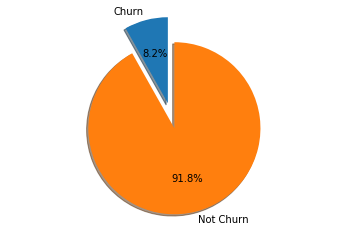

In [254]:
labels = ['Churn', 'Not Churn']
sizes = [df['churn'].value_counts()[1], df['churn'].value_counts()[0]]
explode = (0.3, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.show()

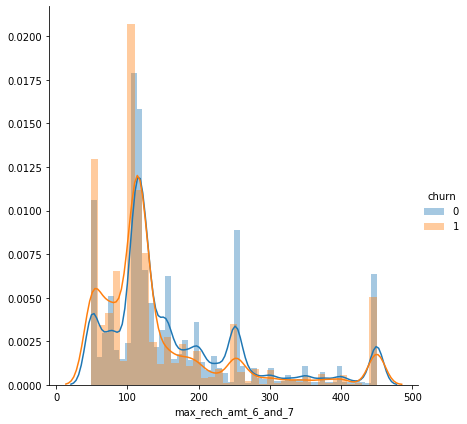

In [255]:
# Relation between churn and maximum recharge amount.
sns.FacetGrid(df, hue='churn', size = 6).map(sns.distplot, "max_rech_amt_6_and_7").add_legend()

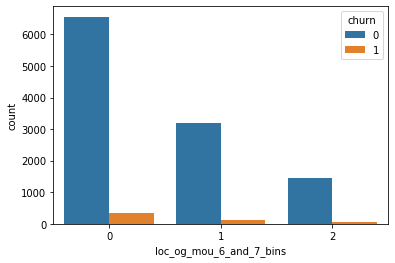

In [256]:
# Relation between churn and avg local outgoing usage.
df['loc_og_mou_6_and_7_bins'] = pd.cut(df['loc_og_mou_6_and_7'], bins = range(200, 1000, 200), labels=[0,1,2])
sns.countplot('loc_og_mou_6_and_7_bins', hue = 'churn', data = df)
df.drop(['loc_og_mou_6_and_7_bins'], axis=1, inplace=True)

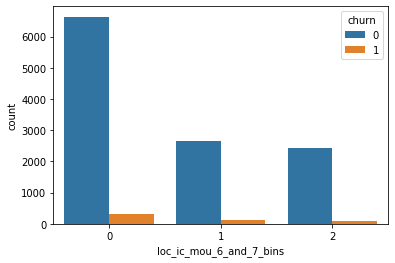

In [257]:
# Relation between churn and avg local incoming usage.
df['loc_ic_mou_6_and_7_bins'] = pd.cut(df['loc_ic_mou_6_and_7'], bins = range(200, 1000, 200), labels=[0,1,2])
sns.countplot('loc_ic_mou_6_and_7_bins', hue = 'churn', data = df)
df.drop(['loc_ic_mou_6_and_7_bins'], axis=1, inplace=True)

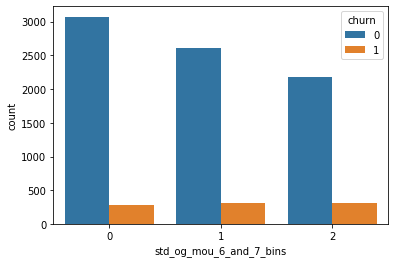

In [258]:
# Relation between churn and avg STD outgoing usage.
df['std_og_mou_6_and_7_bins'] = pd.cut(df['std_og_mou_6_and_7'], bins = range(200, 1000, 200), labels=[0,1,2])
sns.countplot('std_og_mou_6_and_7_bins', hue = 'churn', data = df)
df.drop(['std_og_mou_6_and_7_bins'], axis=1, inplace=True)

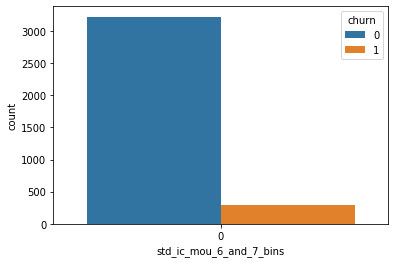

In [259]:
# Relation between churn and STD incoming usage.
df['std_ic_mou_6_and_7_bins'] = pd.cut(df['std_ic_mou_6_and_7'], bins = range(100, 400, 200), labels=[0])
sns.countplot('std_ic_mou_6_and_7_bins', hue = 'churn', data = df)
df.drop(['std_ic_mou_6_and_7_bins'], axis=1, inplace=True)

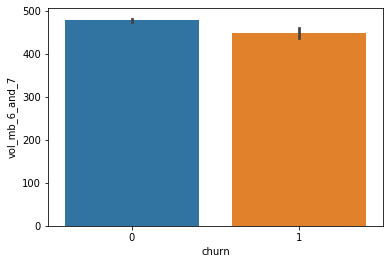

In [260]:
# Relation between churn and data usage.
sns.barplot(x='churn', y='vol_mb_6_and_7', data=df)

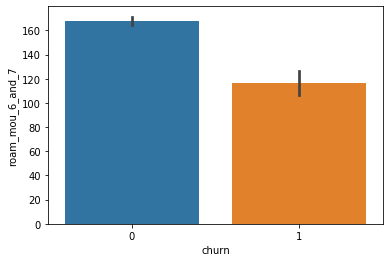

In [261]:
# Relation between churn and roaming.
sns.barplot(x='churn', y='roam_mou_6_and_7', data=df)

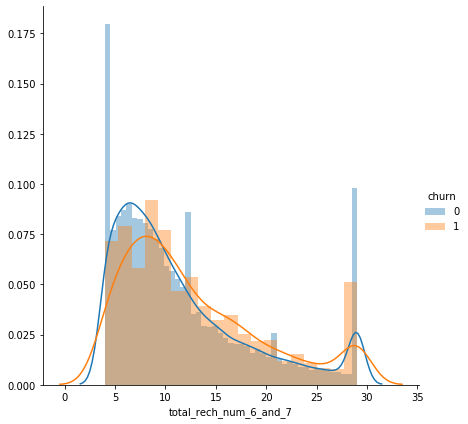

In [262]:
# Relation between churn and total recharge amount.
sns.FacetGrid(df, hue='churn', size = 6).map(sns.distplot, "total_rech_num_6_and_7").add_legend()

## INTERPRETABLE MODEL

### Logistic Regression Classifier

In [263]:
data = df.copy()

In [264]:
# drop the ID and churn column
ID = data[['mobile_number', 'churn']]
data.drop(['mobile_number'], axis=1, inplace=True)

In [265]:
df.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon',
       'churn', 'vol_mb_8', 'roam_mou_8', 'others_og_mou_8', 'others_ic_mou_7',
       'others_ic_mou_8', 'arpu_6_and_7', 'onnet_mou_6_and_7',
       'offnet_mou_6_and_7', 'loc_og_t2t_mou_6_and_7',
       'loc_og_t2m_mou_6_and_7', 'loc_og_mou_6_and_7',
       'std_og_t2t_mou_6_and_7', 'std_og_t2m_mou_6_and_7',
       'std_og_mou_6_and_7', 'loc_ic_t2t_mou_6_and_7',
       'loc_ic_t2m_mou_6_and_7', 'loc_ic_t2f_mou_6_and_7',
       'loc_ic_mou_6_and_7', 'std_ic_t2t_mou_6_and_7',
       'std_ic_t2m_mou_6_and_7', 'std_ic_t2f_mou_6_and_7',
  

### Split the data into independent and dependent variables.

In [266]:
X = data.drop(['churn'], axis=1)
y = data['churn']

### Split the data into train and test data.

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

### Scale the data.

In [268]:
org_columns = X.columns
scaler = StandardScaler()
columns = X.columns
X_train[columns] = scaler.fit_transform(X_train[columns])
X_train

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,aon,vol_mb_8,roam_mou_8,others_og_mou_8,others_ic_mou_7,others_ic_mou_8,arpu_6_and_7,onnet_mou_6_and_7,offnet_mou_6_and_7,loc_og_t2t_mou_6_and_7,loc_og_t2m_mou_6_and_7,loc_og_mou_6_and_7,std_og_t2t_mou_6_and_7,std_og_t2m_mou_6_and_7,std_og_mou_6_and_7,loc_ic_t2t_mou_6_and_7,loc_ic_t2m_mou_6_and_7,loc_ic_t2f_mou_6_and_7,loc_ic_mou_6_and_7,std_ic_t2t_mou_6_and_7,std_ic_t2m_mou_6_and_7,std_ic_t2f_mou_6_and_7,std_ic_mou_6_and_7,total_rech_num_6_and_7,total_rech_amt_6_and_7,max_rech_amt_6_and_7,last_day_rch_amt_6_and_7,vol_mb_6_and_7,roam_mou_6_and_7,others_og_mou_6_and_7,others_ic_mou_6_and_7
10243,-0.431963,-0.709991,-0.757556,-0.555142,-0.358347,-0.511484,-0.539662,-0.567563,-0.690899,-0.456273,0.034195,-0.088147,-0.181636,-0.428253,-0.309513,-0.397148,-0.439922,-1.050986,0.553706,2.804892,2.092946,0.214360,1.356963,-0.371290,-0.607749,-0.414082,-0.305377,-0.055188,-0.813206,-0.725938,-0.590829,-0.122251,-0.347533,-0.616264,-0.667900,-0.828833,-0.724394,-0.148813,0.335868,-0.348119,-0.494371,-0.564504,1.031137,-0.544011,-0.968872,-0.322266,2.320458,2.457253,-0.585468,0.170566,-0.243496,-0.584081
23666,-1.106750,-0.658393,-0.841614,-0.371885,-0.481608,-0.529142,-0.540269,-0.595161,-0.706490,-0.479126,0.686001,2.642779,0.488173,-0.537612,0.562819,-0.397148,0.085281,-0.779440,-0.866814,-0.481327,0.210105,1.947582,-0.525160,-0.371290,-0.607749,-0.403366,-0.385888,-0.997122,-0.850159,-0.403864,-0.737196,0.609966,0.050802,-0.616264,-0.678570,-0.835132,-0.591721,1.391466,3.146041,1.383772,-0.606284,-0.698057,-0.441090,-0.753697,-0.381634,-1.006128,-0.627667,-1.022763,-0.880271,-0.602612,-0.488884,-0.557758
66053,0.424337,-0.081765,1.102125,-0.209905,-0.105427,-0.222212,0.077866,1.694488,0.918069,-0.174895,0.253066,-0.488937,0.014824,-0.234911,0.613723,-0.397148,0.215559,0.578293,0.463637,-0.203618,0.581718,-1.087144,-0.520240,-0.371290,0.164423,-0.414082,1.984629,-0.895707,-0.042179,-0.124269,-0.480233,-0.237804,-0.417131,0.216932,0.178721,0.182742,-0.320784,0.184593,-0.615344,-0.093416,-0.604544,-0.409064,-0.441090,-0.567956,-0.308229,-0.943002,-0.529722,-0.855873,-0.861554,-0.602612,-0.412529,-0.251701
40233,-0.210658,1.617550,-1.036268,-0.704424,-0.910848,-0.931225,2.221877,-0.568410,0.927833,-0.823984,-0.975823,-0.586956,-1.014442,-0.437316,-0.640084,-0.397148,-0.655494,-0.507893,-0.226036,-0.203618,0.333976,-1.087144,-0.406853,-0.371290,-0.089855,-0.414082,-0.399560,-0.734773,1.765501,-1.107367,-0.786094,-0.981988,-1.008077,2.356305,-0.677765,0.991155,-0.873761,-1.005518,-0.602576,-1.026367,-0.268804,-0.701928,-0.441090,-0.645134,-0.895467,-0.851820,-0.333834,-0.587398,-0.563381,-0.602612,-0.376619,-0.613526
25816,-1.492930,-0.722849,-0.997553,-0.756587,-0.932156,-0.963692,-0.540269,-0.600002,-0.709159,-0.836839,-0.991588,-0.586956,-1.023293,-0.537612,-0.640084,-0.397148,-0.687821,-0.779440,-1.381495,-0.944175,-1.028607,1.588874,-0.525160,1.518327,-0.607749,-0.244643,-0.403358,1.105871,0.887008,-0.311974,-0.276982,-0.851711,-0.749686,0.363144,-0.306539,-0.013911,0.843879,-0.811286,-0.569379,-0.402241,-0.276343,-0.218189,-0.441090,-0.337473,0.205604,1.075268,-0.314245,-0.950202,0.038829,2.109536,2.445068,0.349259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53483,-0.576360,-0.752799,-0.554425,-0.703624,-0.732476,-0.749026,-0.540269,-0.294248,-0.534835,-0.769232,-0.723442,0.360019,-0.745634,-0.537612,0.956111,-0.397148,0.338048,-0.915213,-0.583739,-0.203618,0.581718,-0.953819,-0.525160,1.222599,-0.191565,-0.414082,-0.392724,-0.897772,-0.850159,-0.47361

### Build the logistic regression model

In [269]:
logml = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20474
Model:                            GLM   Df Residuals:                    20421
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3746.6
Date:                Mon, 18 May 2020   Deviance:                       7493.3
Time:                        22:31:51   Pearson chi2:                 4.70e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.8483      0.064    -60.407      0.000      -3.973      -3.723
arpu_8                      -0.0884      0.121     -0.731      0.464      -0.325       0.148
onnet_mou_8                  0.1403      0.183      0.767      0.443      -0.218       0.499
offnet_mou_8                 0.5287      0.152      3.471      0.001       0.230       0.827
loc_og_t2t_mou_8            -0.4934      0.160     -3.091      0.002      -0.806      -0.181
loc_og_t2m_mou_8            -0.7487      0.230     -3.255      0.001      -1.199      -0.298
loc_og_mou_8                 0.4000      0.287      1.393      0.164      -0.163       0.963
std_og_t2t_mou_8            -0.4136      0.201     -2.055      0.040      -0.808      -0.019
std_og_t2m_mou_8            -0.7441      0.165     -4.522      0.000      -1.067      -0.422
std_og_mou_8                 0.1686      0.196      0.859      0.391      -0.216       0.553
loc_ic_t2t_mou_8            -0.5354      0.129     -4.137      0.000      -0.789      -0.282
loc_ic_t2m_mou_8            -1.0359      0.189     -5.488      0.000      -1.406      -0.666
loc_ic_t2f_mou_8            -0.5667      0.091     -6.258      0.000      -0.744      -0.389
loc_ic_mou_8                 0.8426      0.232      3.625      0.000       0.387       1.298
std_ic_t2t_mou_8            -0.2500      0.086     -2.900      0.004      -0.419      -0.081
std_ic_t2m_mou_8            -0.4163      0.122     -3.410      0.001      -0.656      -0.177
std_ic_t2f_mou_8            -0.1922      0.062     -3.090      0.002      -0.314      -0.070
std_ic_mou_8                 0.2419      0.153      1.585      0.113      -0.057       0.541
total_rech_num_8            -0.7595      0.072    -10.566      0.000      -0.900      -0.619
total_rech_amt_8             0.1517      0.138      1.099      0.272      -0.119       0.422
max_rech_amt_8              -0.1989      0.063     -3.146      0.002      -0.323      -0.075
last_day_rch_amt_8          -0.7501      0.055    -13.576      0.000      -0.858      -0.642
aon                         -0.2400      0.041     -5.844      0.000      -0.321      -0.160
vol_mb_8                    -0.7714      0.084     -9.192      0.000      -0.936      -0.607
roam_mou_8                   0.1481      0.036      4.085      0.000       0.077       0.219
others_og_mou_8             -0.0712      0.044     -1.635      0.102      -0.157       0.014
others_ic_mou_7              0.0913      0.045      2.027      0.043       0.003       0.180
others_ic_mou_8             -0.0592      0.052     -1.143      0.253      -0.161       0.042
arpu_6_and_7                 0.4108      0.135      3.047      0.002       0.147       0.675
onnet_mou_6_and_7            0.3406      0.158      2.162      0.031       0.032       0.649
offnet_mou_6_a

### Build the model.

In [270]:
# Build the model with appropriate class weightage and use RFE to select 10 features.
logreg = LogisticRegression(class_weight={0:0.082, 1: 0.918})
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)

In [271]:
rfe.support_

array([False, False,  True, False,  True, False, False,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [272]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 22),
 ('onnet_mou_8', False, 43),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 4),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2t_mou_8', False, 8),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_mou_8', False, 30),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 2),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 21),
 ('std_ic_t2m_mou_8', False, 12),
 ('std_ic_t2f_mou_8', False, 25),
 ('std_ic_mou_8', False, 28),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 37),
 ('max_rech_amt_8', False, 23),
 ('last_day_rch_amt_8', True, 1),
 ('aon', False, 7),
 ('vol_mb_8', True, 1),
 ('roam_mou_8', False, 6),
 ('others_og_mou_8', False, 41),
 ('others_ic_mou_7', False, 17),
 ('others_ic_mou_8', False, 42),
 ('arpu_6_and_7', True, 1),
 ('onnet_mou_6_and_7', False, 9),
 ('offnet_mou_6_and_7', False, 39),
 ('loc_og_t2t_mou_6_and_7', False, 32),
 ('loc_og_t2m_mou_6_and_7', False

In [273]:
columns = X_train.columns[rfe.support_]

### Use statsmodel to generate logistic regression model.

In [274]:
X_train_sm = sm.add_constant(X_train[columns])
logml = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20474
Model:                            GLM   Df Residuals:                    20463
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.1
Date:                Mon, 18 May 2020   Deviance:                       7928.2
Time:                        22:31:59   Pearson chi2:                 8.05e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8566      0.063    -60.889      0.000      -3.981      -3.732
offnet_mou_8           1.0060      0.103      9.766      0.000       0.804       1.208
loc_og_t2m_mou_8      -1.2638      0.099    -12.827      0.000      -1.457      -1.071
std_og_t2m_mou_8      -1.1115      0.092    -12.106      0.000      -1.292      -0.932
loc_ic_t2t_mou_8      -0.5437      0.098     -5.559      0.000      -0.735      -0.352
loc_ic_t2m_mou_8      -0.7332      0.165     -4.456      0.000      -1.056      -0.411
loc_ic_mou_8           0.2799      0.192      1.458      0.145      -0.096       0.656
total_rech_num_8      -0.7432      0.044    -16.913      0.000      -0.829      -0.657
last_day_rch_amt_8    -0.9487      0.046    -20.708      0.000      -1.039      -0.859
vol_mb_8              -0.8785      0.069    -12.723      0.000      -1.014      -0.743
arpu_6_and_7           0.4699      0.032     14.771      0.000       0.408       0.532
======================================================================================
"""

### Calculate Variance Inflation Factor to avoid multicollinearity.

In [275]:
vif = pd.DataFrame()
X = X_train_sm.drop('const', axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,16.77
0,offnet_mou_8,11.88
4,loc_ic_t2m_mou_8,11.33
2,std_og_t2m_mou_8,8.48
1,loc_og_t2m_mou_8,5.92
3,loc_ic_t2t_mou_8,3.74
6,total_rech_num_8,1.28
9,arpu_6_and_7,1.27
7,last_day_rch_amt_8,1.24
8,vol_mb_8,1.11


### Helper methods to rebuild model and find VIF once any column is dropped.

In [276]:
def rebuild_model(remove_col, selected_cols, X_train, sm, y_train):
    selected_cols.remove(remove_col)
    X_train_rfe = X_train[selected_cols]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial()).fit()
    return lm, X_train_rfe, selected_cols

def calculate_VIF(pd, X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe.drop('const', axis = 1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [277]:
columns = list(columns)
lm, X_train_sm, col = rebuild_model('loc_ic_mou_8', columns, X_train, sm, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20474
Model:                            GLM   Df Residuals:                    20464
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3965.1
Date:                Mon, 18 May 2020   Deviance:                       7930.1
Time:                        22:32:00   Pearson chi2:                 7.93e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8555      0.063    -60.886      0.000      -3.980      -3.731
offnet_mou_8           1.0200      0.103      9.931      0.000       0.819       1.221
loc_og_t2m_mou_8      -1.2764      0.098    -12.991      0.000      -1.469      -1.084
std_og_t2m_mou_8      -1.1252      0.091    -12.298      0.000      -1.305      -0.946
loc_ic_t2t_mou_8      -0.4365      0.063     -6.964      0.000      -0.559      -0.314
loc_ic_t2m_mou_8      -0.5238      0.080     -6.549      0.000      -0.681      -0.367
total_rech_num_8      -0.7473      0.044    -17.022      0.000      -0.833      -0.661
last_day_rch_amt_8    -0.9491      0.046    -20.695      0.000      -1.039      -0.859
vol_mb_8              -0.8770      0.069    -12.710      0.000      -1.012      -0.742
arpu_6_and_7           0.4703      0.032     14.789      0.000       0.408       0.533
======================================================================================
"""

In [278]:
calculate_VIF(pd, X_train_sm)

,Features,VIF
0,offnet_mou_8,11.82
2,std_og_t2m_mou_8,8.41
1,loc_og_t2m_mou_8,5.87
4,loc_ic_t2m_mou_8,2.08
3,loc_ic_t2t_mou_8,1.32
5,total_rech_num_8,1.28
8,arpu_6_and_7,1.27
6,last_day_rch_amt_8,1.24
7,vol_mb_8,1.11


In [279]:
columns = list(columns)
lm, X_train_sm, col = rebuild_model('offnet_mou_8', columns, X_train, sm, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20474
Model:                            GLM   Df Residuals:                    20465
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4011.1
Date:                Mon, 18 May 2020   Deviance:                       8022.2
Time:                        22:32:00   Pearson chi2:                 9.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8250      0.063    -60.866      0.000      -3.948      -3.702
loc_og_t2m_mou_8      -0.7136      0.080     -8.911      0.000      -0.870      -0.557
std_og_t2m_mou_8      -0.3108      0.041     -7.583      0.000      -0.391      -0.230
loc_ic_t2t_mou_8      -0.4728      0.063     -7.466      0.000      -0.597      -0.349
loc_ic_t2m_mou_8      -0.5654      0.081     -6.993      0.000      -0.724      -0.407
total_rech_num_8      -0.7144      0.043    -16.636      0.000      -0.799      -0.630
last_day_rch_amt_8    -0.8818      0.045    -19.799      0.000      -0.969      -0.795
vol_mb_8              -0.8844      0.068    -12.912      0.000      -1.019      -0.750
arpu_6_and_7           0.5398      0.031     17.463      0.000       0.479       0.600
======================================================================================
"""

In [280]:
calculate_VIF(pd, X_train_sm)

,Features,VIF
3,loc_ic_t2m_mou_8,2.08
0,loc_og_t2m_mou_8,1.97
2,loc_ic_t2t_mou_8,1.31
4,total_rech_num_8,1.27
1,std_og_t2m_mou_8,1.23
5,last_day_rch_amt_8,1.23
7,arpu_6_and_7,1.21
6,vol_mb_8,1.10


### Make predictions.

In [281]:
# Train dataset predictions.
y_train_predicted = lm.predict(X_train_sm)
y_train_predicted

10243    0.003985
23666    0.040701
66053    0.005035
40233    0.116543
25816    0.624387
           ...   
53483    0.089687
47805    0.220849
6411     0.088371
1815     0.050802
42848    0.089580
Length: 20474, dtype: float64

In [282]:
# Calculate probabilities.
y_train_predicted_final = pd.DataFrame({'Churn':y_train.values, 'Churn Probability':y_train_predicted})
y_train_predicted_final

,Churn,Churn Probability
10243,0,0.003985
23666,0,0.040701
66053,0,0.005035
40233,0,0.116543
25816,1,0.624387
...,...,...
53483,0,0.089687
47805,0,0.220849
6411,0,0.088371
1815,0,0.050802


In [283]:
# Find predicted values using probabilities
y_train_predicted_final['Predicted'] = y_train_predicted_final['Churn Probability'].map(lambda x: 1 if x > 0.1 else 0)
y_train_predicted_final.head() 

,Churn,Churn Probability,Predicted
10243,0,0.003985,0
23666,0,0.040701,0
66053,0,0.005035,0
40233,0,0.116543,1
25816,1,0.624387,1


In [284]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_predicted_final['Churn'], y_train_predicted_final['Predicted'])
confusion

array([[15494,  3309],
       [  332,  1339]], dtype=int64)

In [285]:
# accuracy
metrics.accuracy_score(y_train_predicted_final['Churn'], y_train_predicted_final['Predicted'])

0.8221646966884829

In [286]:
TP = confusion[1,1] # true positive 

TN = confusion[0,0] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives 

In [287]:
sensitivity = TP / float(TP+FN)
sensitivity

0.8013165769000599

In [288]:
specificity = TN / float(TN+FP) 
specificity

0.8240174440248896

### Draw the ROC Curve

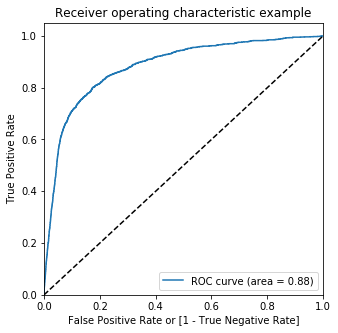

In [289]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted_final['Churn'], y_train_predicted_final['Churn Probability'], drop_intermediate = False )
draw_roc(y_train_predicted_final['Churn'], y_train_predicted_final['Churn Probability'])


In [290]:
# Parameter tuning for cut off probability.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predicted_final[i]= y_train_predicted_final['Churn Probability'].map(lambda x: 1 if x > i else 0)
y_train_predicted_final.head() 

,Churn,Churn Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
10243,0,0.003985,0,1,0,0,0,0,0,0,0,0,0
23666,0,0.040701,0,1,0,0,0,0,0,0,0,0,0
66053,0,0.005035,0,1,0,0,0,0,0,0,0,0,0
40233,0,0.116543,1,1,1,0,0,0,0,0,0,0,0
25816,1,0.624387,1,1,1,1,1,1,1,1,0,0,0


In [291]:
# For every cut off find the metrics.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_predicted_final['Churn'], y_train_predicted_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.081616,1.000000,0.000000
0.1,0.1,0.822165,0.801317,0.824017
0.2,0.2,0.894500,0.685218,0.913099
0.3,0.3,0.917261,0.539198,0.950859
0.4,0.4,0.920729,0.307600,0.975217
0.5,0.5,0.921315,0.153202,0.989576
0.6,0.6,0.920582,0.078396,0.995426
0.7,0.7,0.919996,0.041293,0.998085
0.8,0.8,0.919068,0.010174,0.999840
0.9,0.9,0.918384,0.000000,1.000000


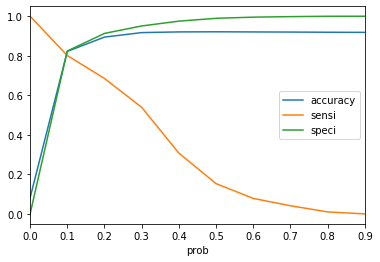

In [292]:
# Plot the metrics
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Test predictions.

In [293]:
# Prepare the column list
col_list = X_train_sm.columns.tolist()
col_list = col_list[1:]

In [294]:
X_test[org_columns] = scaler.transform(X_test[org_columns])
X_test_sm = sm.add_constant(X_test[col_list])

In [295]:
y_test_pred = lm.predict(X_test_sm) 

In [296]:
X_train_sm.shape

(20474, 9)

In [297]:
X_test_sm.shape

(8775, 9)

In [298]:
# Calculate probabilities.
y_test_pred = pd.DataFrame({'Churn':y_test.values, 'Churn Probability':y_test_pred})
y_test_pred

,Churn,Churn Probability
90325,0,0.007721
45510,0,0.014676
99109,0,0.041322
70634,1,0.488173
74492,0,0.000880
...,...,...
48235,0,0.023918
97316,0,0.036056
72329,1,0.308605
97318,0,0.004247


In [299]:
# Find the Predicted churn.
y_test_pred['Predicted'] = y_test_pred['Churn Probability'].map(lambda x: 1 if x > 0.1 else 0)
y_test_pred.head() 

,Churn,Churn Probability,Predicted
90325,0,0.007721,0
45510,0,0.014676,0
99109,0,0.041322,0
70634,1,0.488173,1
74492,0,0.000880,0


In [300]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test_pred['Churn'], y_test_pred['Predicted'])
confusion

array([[6613, 1446],
       [ 159,  557]], dtype=int64)

In [301]:
# accuracy
metrics.accuracy_score(y_test_pred['Churn'], y_test_pred['Predicted'])

0.8170940170940171

In [302]:
TP = confusion[1,1] # true positive 

TN = confusion[0,0] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives 

In [303]:
# sensitivity
sensitivity = TP / float(TP+FN)
sensitivity

0.7779329608938548

In [304]:
# specificity
specificity = TN / float(TN+FP) 
specificity

0.8205732721181288

In [305]:
X_train.shape

(20474, 52)

In [306]:
X_test.shape

(8775, 52)

### Principal Component Analysis.

In [307]:
pca = PCA(random_state=42)

In [308]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [309]:
pca.components_

array([[ 0.14865914, -0.00068736,  0.11479184, ...,  0.05134973,
        -0.01712493,  0.02537819],
       [ 0.23633056,  0.22031629,  0.21423381, ..., -0.01205002,
         0.05726846,  0.05355701],
       [-0.00582828, -0.18523467, -0.04948703, ...,  0.18918221,
         0.10171476,  0.09631784],
       ...,
       [-0.0254175 , -0.02724358,  0.12942586, ..., -0.00296452,
         0.0019727 , -0.0049252 ],
       [-0.01395824,  0.13827423,  0.03766878, ...,  0.00462944,
         0.00738154, -0.00053858],
       [ 0.01088445, -0.28552442, -0.00949463, ..., -0.00878797,
        -0.01016283,  0.00250351]])

In [310]:
pca.explained_variance_ratio_

array([1.89682900e-01, 1.39524167e-01, 8.05218061e-02, 6.80524243e-02,
       6.34640149e-02, 4.65375504e-02, 4.04955119e-02, 3.78830750e-02,
       3.34802315e-02, 2.90939257e-02, 2.64444611e-02, 2.40397878e-02,
       1.85770463e-02, 1.79725713e-02, 1.58146180e-02, 1.50739174e-02,
       1.41659301e-02, 1.25844754e-02, 1.11491748e-02, 9.61817842e-03,
       8.97251548e-03, 8.86708559e-03, 8.18156806e-03, 7.74317403e-03,
       7.42800673e-03, 6.98569701e-03, 6.72229383e-03, 6.01737324e-03,
       5.46741990e-03, 4.52102190e-03, 4.40302510e-03, 4.05194810e-03,
       3.84496567e-03, 3.49404162e-03, 3.12800732e-03, 3.11099188e-03,
       2.04936233e-03, 1.76342997e-03, 1.62210435e-03, 1.29099742e-03,
       1.03032953e-03, 9.41061001e-04, 8.70840994e-04, 6.46718086e-04,
       4.94464883e-04, 4.48875211e-04, 4.42226391e-04, 4.07940757e-04,
       2.87604378e-04, 2.36677153e-04, 2.07085932e-04, 1.45378704e-04])

In [311]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
var_cum

array([0.1896829 , 0.32920707, 0.40972887, 0.4777813 , 0.54124531,
       0.58778286, 0.62827837, 0.66616145, 0.69964168, 0.72873561,
       0.75518007, 0.77921986, 0.7977969 , 0.81576947, 0.83158409,
       0.84665801, 0.86082394, 0.87340841, 0.88455759, 0.89417577,
       0.90314828, 0.91201537, 0.92019694, 0.92794011, 0.93536812,
       0.94235381, 0.94907611, 0.95509348, 0.9605609 , 0.96508192,
       0.96948495, 0.9735369 , 0.97738186, 0.9808759 , 0.98400391,
       0.9871149 , 0.98916427, 0.9909277 , 0.9925498 , 0.9938408 ,
       0.99487113, 0.99581219, 0.99668303, 0.99732975, 0.99782421,
       0.99827309, 0.99871531, 0.99912325, 0.99941086, 0.99964754,
       0.99985462, 1.        ])

##### Around 90% of the variance is explained by just 20 parameters.

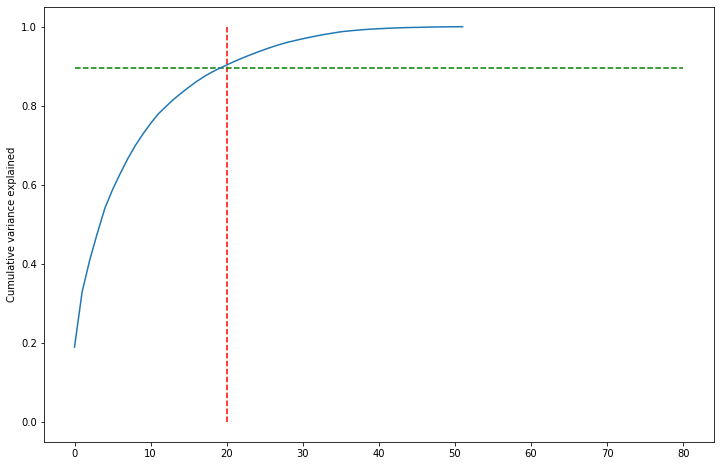

In [312]:
# Scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.89436744, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [313]:
pca_final = IncrementalPCA(n_components=20)

### Transform the train and test data according to the PCA components.

In [314]:
df_train_pca = pca_final.fit_transform(X_train)

In [315]:
df_train_pca.shape

(20474, 20)

In [316]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [317]:
corrmat.shape

(20, 20)

#### In the heatmap shown, there is almost zero correlation between the 20 parameters. This is a near idea heatmap with almost no multicollinearity whatsoever.

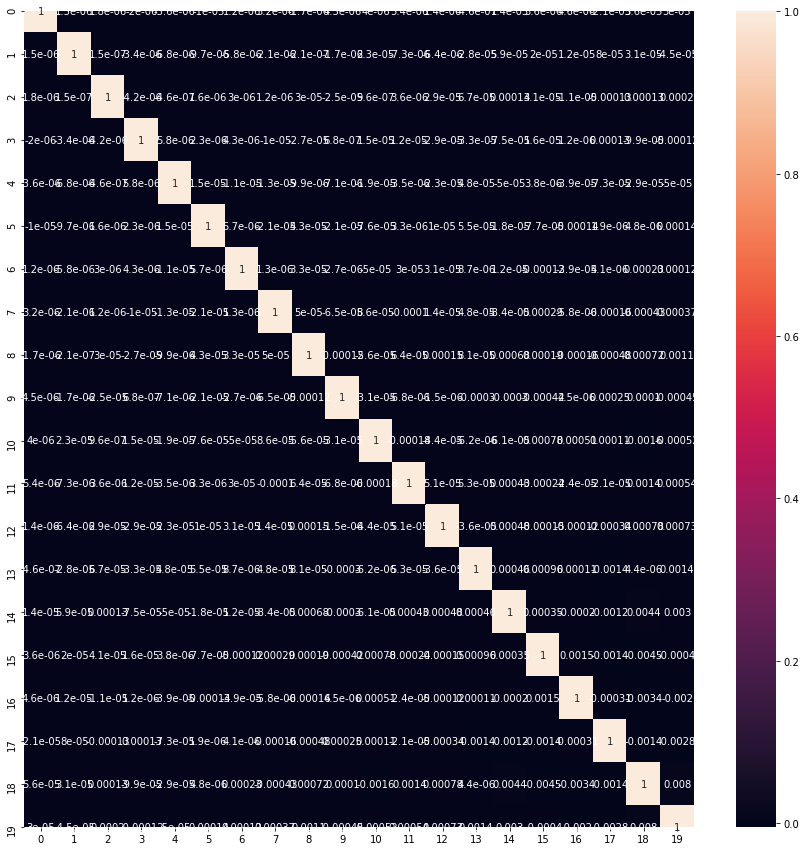

In [318]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [319]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8775, 20)

### MODELS WITH PCA

### DECISION TREE CLASSIFIER

### Hyperparameter Tuning

Let us first tune all the necessary hyperparameters. Post that we will do grid search and finally build the Model.

### Tuning max_depth

In [320]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 30, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100, class_weight={0:0.082, 1: 0.918})

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             para

In [321]:
# Show the results of tuning
scores = tree.cv_results_
score_df = pd.DataFrame(scores)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.362961,0.041472,0.002827,0.000696,5,{'max_depth': 5},0.825153,0.842002,0.780464,0.810012,0.818515,0.815229,0.020307,5,0.826913,0.842054,0.796325,0.828317,0.828632,0.824448,0.015096
1,0.648003,0.014017,0.002457,0.000454,10,{'max_depth': 10},0.850549,0.852747,0.844933,0.838828,0.856131,0.848638,0.006110,4,0.886379,0.885952,0.884914,0.885524,0.902808,0.889115,0.006864
2,0.630112,0.164879,0.001808,0.000735,15,{'max_depth': 15},0.874969,0.872039,0.877900,0.859829,0.870542,0.871056,0.006155,3,0.929788,0.928201,0.939679,0.934428,0.939377,0.934295,0.004739
3,0.793548,0.057713,0.002498,0.000447,20,{'max_depth': 20},0.886203,0.884982,0.889377,0.876435,0.881778,0.883755,0.004395,2,0.954332,0.961109,0.965932,0.958300,0.957692,0.959473,0.003883
4,0.833262,0.044382,0.002791,0.000315,25,{'max_depth': 25},0.894261,0.892308,0.891331,0.882051,0.885931,0.889176,0.004508,1,0.969168,0.974052,0.979120,0.971549,0.971978,0.973173,0.003354


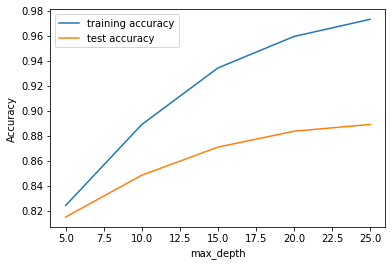

In [322]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

In [323]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 100)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,
                               class_weight={0:0.082, 1: 0.918})

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             para

In [324]:
# Show the results of tuning
scores = tree.cv_results_
score_df = pd.DataFrame(scores)
score_df[score_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.374158,0.115914,0.001676,0.000271,200,{'min_samples_leaf': 200},0.819536,0.845421,0.790476,0.821001,0.843674,0.824022,0.019993,1,0.816167,0.843763,0.802369,0.837841,0.856166,0.831261,0.019403


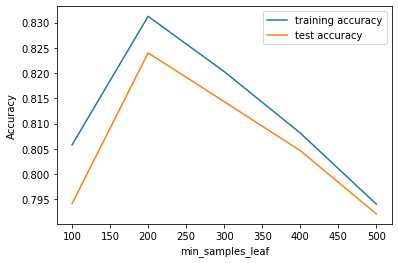

In [325]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_split

In [326]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 600, 100)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100, 
                               class_weight={0:0.082, 1: 0.918})

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             para

In [327]:
# Show the results of tuning
scores = tree.cv_results_
score_df = pd.DataFrame(scores)
score_df[score_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.843082,0.047187,0.002779,0.000247,100,{'min_samples_split': 100},0.804151,0.810745,0.808547,0.794139,0.7936,0.802237,0.007156,1,0.839917,0.84645,0.850113,0.840711,0.836996,0.842837,0.004757


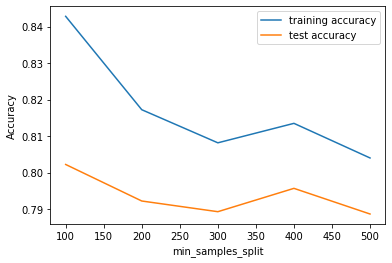

In [328]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [329]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': range(100, 500, 100),
    'min_samples_split': range(400, 800, 100),
    'criterion': ["gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.086, 1: 0.914})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=18)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  14 tasks      | elapsed:    7.0s
[Parallel(n_jobs=18)]: Done 144 out of 144 | elapsed:   14.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.086, 1: 0.914},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=18,
             param

In [330]:
# Show gridsearch results.
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.419628,0.119823,0.003314,0.000482,gini,3,100,400,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790183,0.81685,0.828253,0.811762,0.015953,15
1,0.472971,0.131573,0.002996,0.000045,gini,3,100,500,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790183,0.81685,0.828253,0.811762,0.015953,15
2,0.663618,0.156342,0.003841,0.000132,gini,3,100,600,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790183,0.81685,0.828253,0.811762,0.015953,15
3,0.582224,0.230092,0.002966,0.000096,gini,3,100,700,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790183,0.81685,0.828253,0.811762,0.015953,15
4,0.611958,0.260650,0.002845,0.000242,gini,3,200,400,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790183,0.81685,0.828253,0.811762,0.015953,15


In [331]:
# model parameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.827586976654972
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.086, 1: 0.914},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


### Build the model

In [332]:
clf = DecisionTreeClassifier(class_weight={0:0.082, 1: 0.918},
                                  criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=200,
                                  min_samples_split=400)
clf.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.082, 1: 0.918},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

### Train and test metrics

In [333]:
clf.score(df_train_pca,y_train)

0.8055582690241282

In [334]:
y_pred = clf.predict(df_train_pca)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     18803
           1       0.27      0.83      0.41      1671

    accuracy                           0.81     20474
   macro avg       0.63      0.82      0.65     20474
weighted avg       0.92      0.81      0.85     20474



In [335]:
confusion_matrix(y_train, y_pred)

array([[15098,  3705],
       [  276,  1395]], dtype=int64)

In [336]:
accuracy_score(y_train, y_pred)

0.8055582690241282

In [337]:
recall_score(y_train, y_pred)

0.8348294434470377

In [338]:
y_pred = clf.predict(df_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8059
           1       0.26      0.79      0.39       716

    accuracy                           0.80      8775
   macro avg       0.62      0.79      0.63      8775
weighted avg       0.92      0.80      0.84      8775



In [339]:
confusion_matrix(y_test, y_pred)

array([[6425, 1634],
       [ 149,  567]], dtype=int64)

In [340]:
accuracy_score(y_test, y_pred)

0.7968091168091168

In [341]:
recall_score(y_test, y_pred)

0.7918994413407822

### SUPPORT VECTOR MACHINES (SVM) CLASSIFIER

### Hyperparameter Tuning

In [342]:
# Select the number of folds.
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

### Tuning regulariation parameter C.

In [343]:
# specify range of parameters (C) as a list
params = {"C": range(1, 6)}

model = SVC(class_weight={0:0.086, 1: 0.914})

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = 15,
                       return_train_score=True)      

In [344]:
model_cv.fit(df_train_pca, y_train)  

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:   38.3s remaining:  4.2min
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:   47.7s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={0: 0.086, 1: 0.914}, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=15, param_grid={'C': range(1, 6)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [345]:
# Show the tuning results.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,31.304156,6.090133,4.555928,1.491424,1,{'C': 1},0.876337,0.862418,0.867233,0.868663,0.005772,5,0.874277,0.878599,0.868718,0.873865,0.004044
1,29.254348,5.599157,5.759641,2.463966,2,{'C': 2},0.878242,0.863297,0.866061,0.869200,0.006492,2,0.877940,0.881163,0.870037,0.876380,0.004674
2,27.458652,1.522651,5.090855,1.783591,3,{'C': 3},0.876190,0.864029,0.866940,0.869053,0.005185,4,0.880138,0.883581,0.872088,0.878602,0.004816
3,20.239148,2.555927,7.341360,3.005194,4,{'C': 4},0.875897,0.865934,0.865768,0.869200,0.004736,3,0.881530,0.885999,0.874432,0.880654,0.004763
4,27.900673,3.227483,3.508279,0.603051,5,{'C': 5},0.876484,0.867253,0.865621,0.869786,0.004783,1,0.883581,0.887977,0.875311,0.882290,0.005251


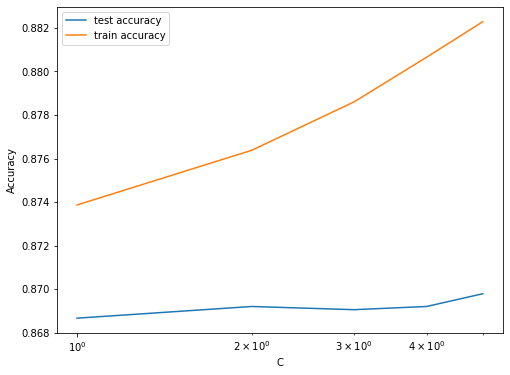

In [346]:
# Plot the accuracies.
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [347]:
model_cv.best_score_

0.8697858667319394

In [348]:
# Note that since C is a regularization parameter, hence the more C increases the wider will be the gap between train and 
# test data accuracies. Hence we keep C to an optimal level.
model_cv.best_params_['C']

5

### Build the model

In [349]:
model = SVC(C=model_cv.best_params_['C'], class_weight={0:0.086, 1: 0.914})

# fit
model.fit(df_train_pca, y_train)

# predict
y_pred = model.predict(df_train_pca)

### Train and test metrics.

In [350]:
confusion_matrix(y_train, y_pred)

array([[16586,  2217],
       [  210,  1461]], dtype=int64)

In [351]:
accuracy_score(y_train, y_pred)

0.881459411937091

In [352]:
recall_score(y_train, y_pred)

0.874326750448833

In [353]:
y_pred = model.predict(df_test_pca)
confusion_matrix(y_test, y_pred)

array([[7053, 1006],
       [ 163,  553]], dtype=int64)

In [354]:
accuracy_score(y_test, y_pred)

0.8667806267806267

In [355]:
recall_score(y_test, y_pred)

0.7723463687150838

### ADABOOST (SHALLOW DECISION TREE) CLASSIFIER

In [356]:
# Build the decision tree.
tree = DecisionTreeClassifier(max_depth=2, 
                              random_state=100,
                              class_weight={0:0.086, 1: 0.914}
                             ) 

In [357]:
tree.fit(df_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.086, 1: 0.914},
                       criterion='gini', max_depth=2, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [358]:
y_pred = tree.predict(df_test_pca)

In [359]:
metrics.accuracy_score(y_test, y_pred)

0.8505982905982906

### Hyperparameter tuning.

### Tuning n_estimators.

In [360]:
estimators = list(range(10,60,10)) 

results = []
for estimator in estimators:    
    adaB = AdaBoostClassifier(base_estimator=tree, n_estimators=estimator)
    adaB.fit(df_train_pca, y_train) 
    y_pred = adaB.predict(df_test_pca)
    results.append(metrics.accuracy_score(y_test, y_pred))

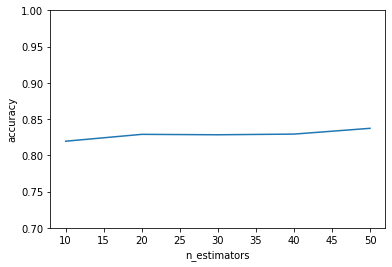

In [361]:
plt.plot(estimators, results)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.70, 1])
plt.show()

### Build the model

In [362]:
abaB = AdaBoostClassifier(base_estimator=tree, n_estimators=20)
adaB.fit(df_train_pca, y_train) 
y_pred = adaB.predict(df_test_pca)

In [363]:
accuracy_score(y_test,y_pred)

0.8373789173789173

In [364]:
recall_score(y_test,y_pred)

0.7527932960893855

### RANDOM FOREST CLASSIFIER

### Hyperparameter Tuning

### Tuning max_depth

In [365]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.082, 1: 0.918})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                     scoring="accuracy",
                     n_jobs = 9,
                     return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

In [366]:
# Show the results of the tuning
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.961571,0.333497,0.124976,0.031142,2,{'max_depth': 2},0.810256,0.832967,0.851114,0.831446,0.016715,4,0.803942,0.841600,0.851575,0.832372,0.020512
1,7.778852,0.318334,0.142579,0.006420,7,{'max_depth': 7},0.882784,0.876337,0.876758,0.878626,0.002945,3,0.889369,0.894351,0.895531,0.893084,0.002670
2,10.783332,0.165213,0.189834,0.017299,12,{'max_depth': 12},0.917216,0.907546,0.904601,0.909788,0.005388,2,0.947249,0.951718,0.951209,0.950059,0.001998
3,9.865734,0.294029,0.193407,0.006723,17,{'max_depth': 17},0.922051,0.915604,0.916325,0.917993,0.002884,1,0.972379,0.971500,0.972894,0.972257,0.000576


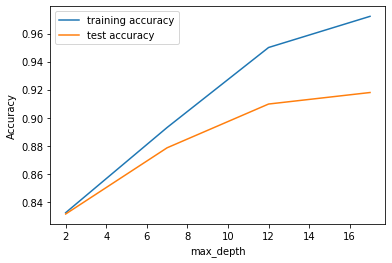

In [367]:
# Show the plot of accuracies
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [368]:
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(1, 6)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight={0:0.082, 1: 0.918})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                     scoring="accuracy",
                     return_train_score=True,
                     n_jobs=9)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

In [369]:
# Show the results of tuning
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.159348,0.007534,0.004086,0.000850,1,{'n_estimators': 1},0.891282,0.890256,0.893025,0.891521,0.001143,5,0.960876,0.961169,0.960586,0.960877,0.000238
1,0.289222,0.005940,0.007516,0.001216,2,{'n_estimators': 2},0.917363,0.916190,0.917057,0.916870,0.000497,3,0.962342,0.962854,0.960806,0.962001,0.000870
2,0.356108,0.025546,0.008023,0.001409,3,{'n_estimators': 3},0.915165,0.916484,0.914859,0.915503,0.000705,4,0.979266,0.982196,0.983370,0.981611,0.001726
3,0.378262,0.026477,0.009962,0.000700,4,{'n_estimators': 4},0.920000,0.920733,0.918816,0.919850,0.000790,2,0.975016,0.976262,0.976996,0.976092,0.000817
4,0.492968,0.018365,0.013078,0.002171,5,{'n_estimators': 5},0.925714,0.917509,0.920135,0.921119,0.003421,1,0.986080,0.987545,0.985641,0.986422,0.000814


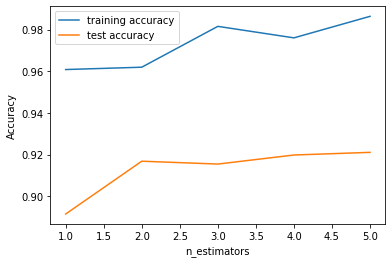

In [370]:
# Show the plot of accuracies
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [371]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [5, 10, 20]}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.082, 1: 0.918})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                     return_train_score=True,
                     n_jobs=9)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

In [372]:
# Show the results of tuning
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.592609,0.230085,0.233094,0.021509,5,{'max_features': 5},0.926447,0.924103,0.922186,0.924245,0.001742,2,1.000000,0.999927,1.0,0.999976,0.000035
1,25.138710,0.941775,0.195846,0.012037,10,{'max_features': 10},0.926593,0.922930,0.923066,0.924196,0.001696,3,0.999927,1.000000,1.0,0.999976,0.000035
2,47.259618,0.442540,0.185525,0.008031,20,{'max_features': 20},0.925861,0.922637,0.925117,0.924538,0.001378,1,0.999927,1.000000,1.0,0.999976,0.000035


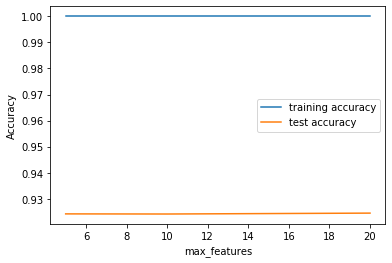

In [373]:
# Show the plot of accuracies
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [374]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.082, 1: 0.918})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                     return_train_score=True,
                     n_jobs=9)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

In [375]:
# Show the results of tuning
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.268491,0.256121,0.182212,0.025438,100,{'min_samples_leaf': 100},0.864615,0.859780,0.859467,0.861287,0.002357,1,0.863873,0.870100,0.871722,0.868565,0.003383
1,7.151229,0.852810,0.193833,0.022755,150,{'min_samples_leaf': 150},0.854505,0.858022,0.856829,0.856452,0.001460,2,0.854275,0.864532,0.866007,0.861605,0.005218
2,6.760850,0.775407,0.175018,0.022861,200,{'min_samples_leaf': 200},0.852747,0.853040,0.847450,0.851079,0.002569,3,0.853909,0.859257,0.855385,0.856183,0.002255
3,5.913461,0.497342,0.159486,0.001491,250,{'min_samples_leaf': 250},0.845128,0.849670,0.853898,0.849566,0.003581,5,0.846362,0.855081,0.861685,0.854376,0.006275
4,5.876957,0.443861,0.144881,0.015686,300,{'min_samples_leaf': 300},0.845861,0.845568,0.849795,0.847074,0.001927,6,0.845263,0.853103,0.852088,0.850151,0.003481


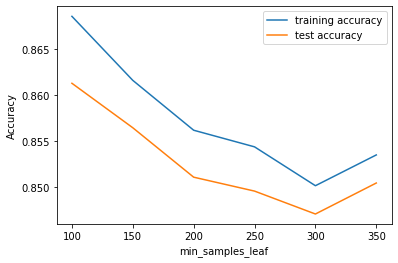

In [376]:
# Show the plot of accuracies
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [377]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.082, 1: 0.918})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                     return_train_score=True,
                     n_jobs=9)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

In [378]:
# Show the results of tuning
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.892582,0.888290,0.188936,0.045007,200,{'min_samples_split': 200},0.882637,0.876190,0.873388,0.877405,0.003872,1,0.886805,0.891201,0.891062,0.889689,0.002040
1,9.138556,0.324844,0.185262,0.021997,250,{'min_samples_split': 250},0.878974,0.874725,0.870750,0.874817,0.003358,2,0.879405,0.889589,0.886520,0.885171,0.004266
2,10.006419,0.419209,0.160480,0.033486,300,{'min_samples_split': 300},0.872527,0.870037,0.864156,0.868907,0.003510,3,0.874496,0.885706,0.877143,0.879115,0.004784
3,8.504126,0.873709,0.168250,0.003049,350,{'min_samples_split': 350},0.869744,0.866960,0.864742,0.867148,0.002046,4,0.870247,0.878526,0.879341,0.876038,0.004108
4,8.554646,0.583738,0.166313,0.016868,400,{'min_samples_split': 400},0.866520,0.867106,0.858294,0.863974,0.004023,5,0.868928,0.877354,0.871868,0.872717,0.003492


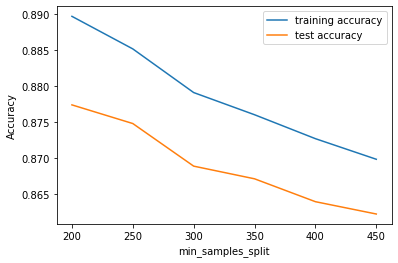

In [379]:
# Show the plot of accuracies
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [380]:
param_grid = {
    'max_depth': [7, 12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(300, 400, 50),
    'n_estimators': [2, 4], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.082, 1: 0.918})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 18,verbose = 1)

In [381]:
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=18)]: Done  96 out of  96 | elapsed:    7.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.082, 1: 0.918},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

### Model result parameters

In [382]:
grid_search.best_score_

0.8393571492985327

In [383]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 150,
 'min_samples_split': 300,
 'n_estimators': 4}

### Build the model

In [384]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=200, 
                             min_samples_split=300,
                             max_features=5,
                             n_estimators=4,
                             class_weight={0:0.082, 1: 0.918})

In [385]:
rfc.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.082, 1: 0.918}, criterion='gini',
                       max_depth=12, max_features=5, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=300, min_weight_fraction_leaf=0.0,
                       n_estimators=4, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Train and test metrics

In [386]:
predictions = rfc.predict(df_test_pca)

In [387]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8059
           1       0.29      0.75      0.42       716

    accuracy                           0.83      8775
   macro avg       0.63      0.79      0.66      8775
weighted avg       0.92      0.83      0.86      8775



In [388]:
print(confusion_matrix(y_test,predictions))

[[6759 1300]
 [ 179  537]]


In [389]:
accuracy_score(y_test,predictions)

0.8314529914529915

In [390]:
recall_score(y_test,predictions)

0.75

### Approach

DataSet: The usage and spending pattern of customers which determines whether whether a customer is likely to churn from the network or not

Approach: Using the 80-20 rule, we determine the top 30%ile of customers which are regarded as high value customers. Here high value customers are those which are extremely important to the service provider and maximum efforts must be made in order to ensure that these customers do not churn. Mathematically speaking, the customers who have done maximum average recharge over the months of June and July are regarded as high value customers.

Modelling Data: These high value customers are used in the modelling process to determine their likelyhood to churn the network. Whether a customer churns or not is determined by the fact that in September has the customer made any usage with respect to calls or data. A customer which has no usage at all is assumed to have churned.

Model Data Preparation: After cleaning the data, a few derrived metrics are calculated which can be useful parameters to determine the churn possibility of a customer. One such important metric is the average of june and july usage/expenditure of the customer. Since it is a time progressive dataset, the months closer to the churn decision month will have a higher impact on the churn decision, viz September. Hence, in order to remove such bias, the average of june and july minths is taken.

Model Generation: A total of 5 models have been created.

1) Logistic Regression (without PCA)

2) Decision Tree (with PCA)

3) Support Vector Machine (SVM) (with PCA)

4) ADABoost (with PCA)

5) Random Forest (with PCA)

All these are classification models and give various results according to their hyperparameters.

### Parameters

ACCURACY and RECALL are the two parameters that are precisely focussed upon. We need to build an accurate model but at the same time we need to minimize the type 2 errors. If a customer who isn't a churn candidate is predicted as churn would not have much impact. However, a customer who is a churn candidate is not captured may lead to loss of business. 

Out of all the models, decision tree and logistic regression gives the most accurate results although the difference is miniscule.

The following columns are major decisive paramters for the churn prediction of a customer.

offnet_mou_8 (Minutes of usage outside current network)

loc_og_t2m_mou_8 (Local Outgoing calls outside current network)

std_og_t2m_mou_8 (STD Outgoing calls outside current network)

loc_ic_t2t_mou_8 (Local Income calls within current network)

loc_ic_t2m_mou_8 (Local Income calls outside current network)	 

total_rech_num_8 (Total recharge done)	

last_day_rch_amt_8 (Latest recharge amount)

vol_mb_8 (Volume of data used)

arpu_6_and_7 (Average revenue per user)

The important thing to note here is that all the parameters (except 1) correspond to September (latest month). This makes perfect sense as the data is time series and the latest months would have the highest impact on the prediction. Though the average revenue over last few months is also taken into account but all the usage based metrics correspond to the decisive month i.e.., September. Let us see how these parameters impact the churn.

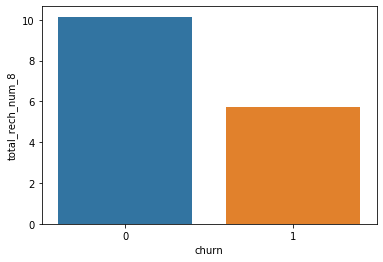

In [391]:
sns.barplot(x='churn', y='total_rech_num_8', data=df[['total_rech_num_8', 'churn']].groupby('churn').mean().reset_index())

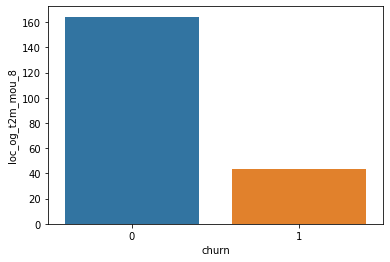

In [392]:
sns.barplot(x='churn', y='loc_og_t2m_mou_8', data=df[['loc_og_t2m_mou_8', 'churn']].groupby('churn').mean().reset_index())

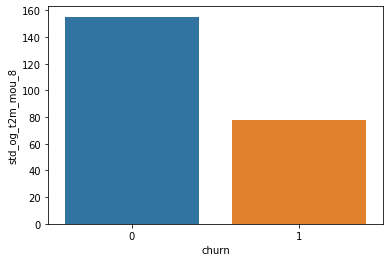

In [393]:
sns.barplot(x='churn', y='std_og_t2m_mou_8', data=df[['std_og_t2m_mou_8', 'churn']].groupby('churn').mean().reset_index())

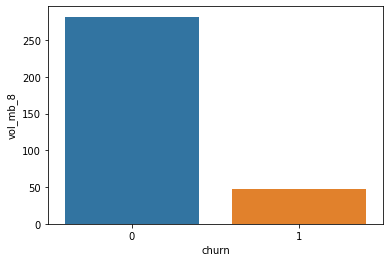

In [394]:
sns.barplot(x='churn', y='vol_mb_8', data=df[['vol_mb_8', 'churn']].groupby('churn').mean().reset_index())

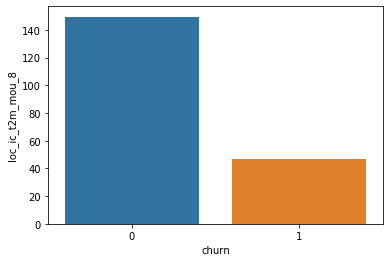

In [395]:
sns.barplot(x='churn', y='loc_ic_t2m_mou_8', data=df[['loc_ic_t2m_mou_8', 'churn']].groupby('churn').mean().reset_index())

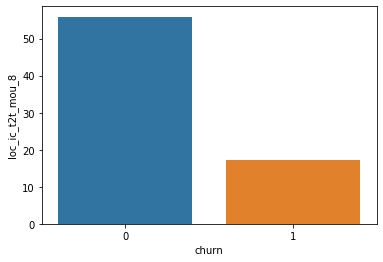

In [396]:
sns.barplot(x='churn', y='loc_ic_t2t_mou_8', data=df[['loc_ic_t2t_mou_8', 'churn']].groupby('churn').mean().reset_index())

As you can see that their is a significant difference between the usage of churned customers to that of non-churned customers.

### Recommendations

In order to ensure that the number of people who do not churn, the telecom operator must take care of few things

1) They should interact with customers directly to identify what went wrong and try to understand the concerns.

2) The data collection should be periodic rather than a one time process. Continuous evaluation of churn rate is mandatory.

3) One of the parameters in STD Outgoing calls. It should be ensured that high changes are not levied and STD specific top-up / recharge plans should be rolled out.

4) Local income calls are extremely important. However, since incoming calls do not levy any charges, the possible situations might be that the people who churned are residing in an area with non adequate network for the concerned provider. The complaints department should probably look into customers' complaints from these areas and resolve them at the earliest. 

5) Another possibility regarding incoming call usage is that the customer is a dual SIM user and is using the concerned network provider SIM as a secondary contact number. This can be dealt with providing certain incentives to the customer and also keeping a vigilant eye on the primary network of the customer in order to encash any opportunity where the customer isn't satisfied with his/her primary telecom provider.

### [METRIC] Execution Time 3.6 minutes on 16GB RAM, 4GB VRAM and 1TB SSD.